In [684]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from glob import glob
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

## PPG analysis (Why we should consider a singal in frequency domain)

In [691]:
def draw_ppg_fft_signal(target, fold, group_num, shot=5):
    if target == 'ppgbp' or target == 'sensors':
        source = 'sensors'
    else:
        source = 'sensors'
        target = 'bcg'

    path = f'../results/errors_{source}_{target}_shot{shot}_train_head_True_sym_True_ours.csv'
        
    df = pd.read_csv(path)
    group_ids = df.loc[df.fold==fold].group.values

    path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_shot{shot}_sym_prompt_*.pt")
 
    print(path)
    path_embs = sorted(path_embs)
    print(path_embs)

    print(f"Fold {fold}, Group: {set(group_ids)}")

    print("Get ", path_embs[2])
    prompted_inputs = torch.load(path_embs[2], map_location='cpu')
    print(prompted_inputs.shape)
    print("Get ", path_embs[3])
    raw_inputs = torch.load(path_embs[3], map_location='cpu')
    
    sample_list = np.where(group_ids==group_num)[0]

    if len(sample_list) == 0:
        print(f"Group {group_num} in fold {fold} is empty")
    else:
        sample_list = np.random.choice(np.where(group_ids==1)[0],size=min(len(sample_list), 20))

        for k in sample_list:
            # Step 1: Generate a periodic time series data
            t = np.linspace(0, 1, raw_inputs[0].size()[0])
            # Convert data to torch tensor
            
            # Step 2: Perform FFT using torch.fft.fft
            data_tensor = torch.tensor(raw_inputs[k], dtype=torch.float32)
            fft_result = torch.fft.fft(data_tensor, dim=-1)
            fft_freq = np.fft.fftfreq(t.size, d=(t[1] - t[0]))
            
            # Step 3: Visualize the original time series and FFT result
            fig, axs = plt.subplots(6, 1, figsize=(12, 10))
            
            # Plot the original time series data
            axs[0].plot(t, raw_inputs[k])
            axs[0].set_title(f'Original PPG')
            axs[0].set_xlabel('Time (s)')
            axs[0].set_ylabel('PPG')

            # Plot the original time series data
            axs[1].plot(t, fft_result.real)
            axs[1].set_title('FFT real')
            axs[1].set_xlabel('Time (s)')
            axs[1].set_ylabel('Magnitude')

            # Plot the original time series data
            axs[2].plot(t, fft_result.imag)
            axs[2].set_title('FFT imag')
            axs[2].set_xlabel('Time (s)')
            axs[2].set_ylabel('Magnitude')

            # Plot the FFT result (Magnitude Spectrum)
            # magnitude_spectrum = torch.abs(fft_result.real).cpu().numpy()
            magnitude_spectrum = 2*np.abs(fft_result.cpu().numpy())
            axs[3].plot(fft_freq[:len(t)//2], magnitude_spectrum[:len(t)//2])
            axs[3].set_title('FFT Result (Magnitude Spectrum)')
            axs[3].set_xlabel('Frequency (Hz)')
            axs[3].set_ylabel('Magnitude')

            # Plot the FFT result (Magnitude Spectrum)
            axs[4].plot(t, prompted_inputs[k])
            axs[4].set_title('Prompted input')
            axs[4].set_xlabel('Time (s)')
            axs[4].set_ylabel('PPG')

             # Plot the FFT result (Magnitude Spectrum)
            # magnitude_spectrum = torch.abs(fft_result.real).cpu().numpy()
            data_tensor = torch.tensor(prompted_inputs[k], dtype=torch.float32)
            fft_result = torch.fft.fft(data_tensor, dim=-1)
            fft_freq = np.fft.fftfreq(t.size, d=(t[1] - t[0]))

            magnitude_spectrum = 2*np.abs(fft_result.cpu().numpy())
            axs[5].plot(fft_freq[:len(t)//2], magnitude_spectrum[:len(t)//2])
            axs[5].set_title('Prompted Input iFFT Result (Magnitude Spectrum)')
            axs[5].set_xlabel('Frequency (Hz)')
            axs[5].set_ylabel('Magnitude')

            fig.suptitle(f'{target} PPG sample {k} [Group {group_num}]', fontsize=16)
            
            plt.tight_layout()
            plt.show()

../results/errors_sensors_ppgbp_shot5_train_head_True_sym_True_ours.csv
['../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_hidden_embs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompt_hist.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompted_inputs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_raw_inputs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_hidden_embs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompt_hist.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompted_inputs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_raw_inputs.pt']
Fold 0, Group: {0, 1,

/tmp/ipykernel_739129/2855206533.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(raw_inputs[k], dtype=torch.float32)
/tmp/ipykernel_739129/2855206533.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(prompted_inputs[k], dtype=torch.float32)


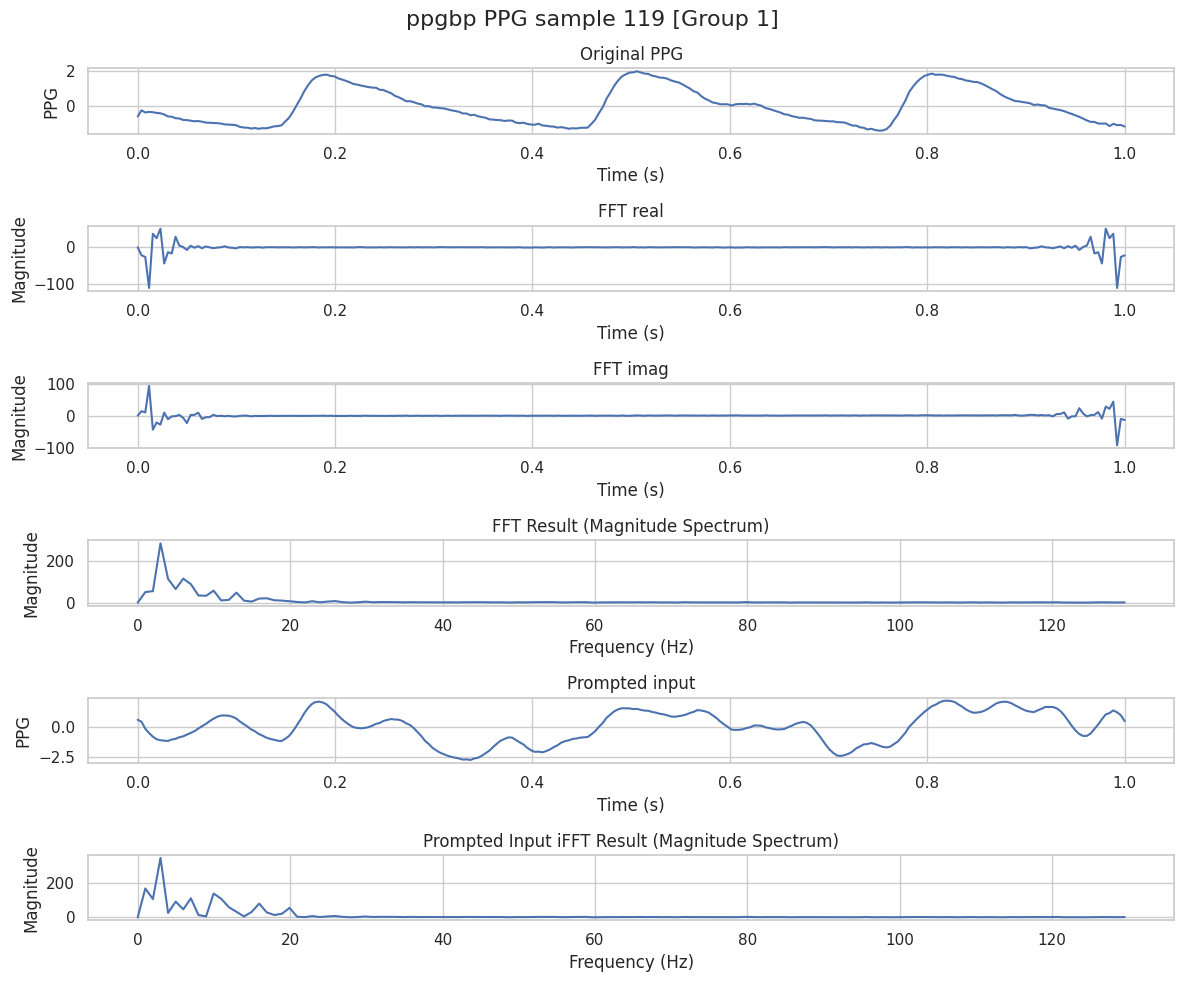

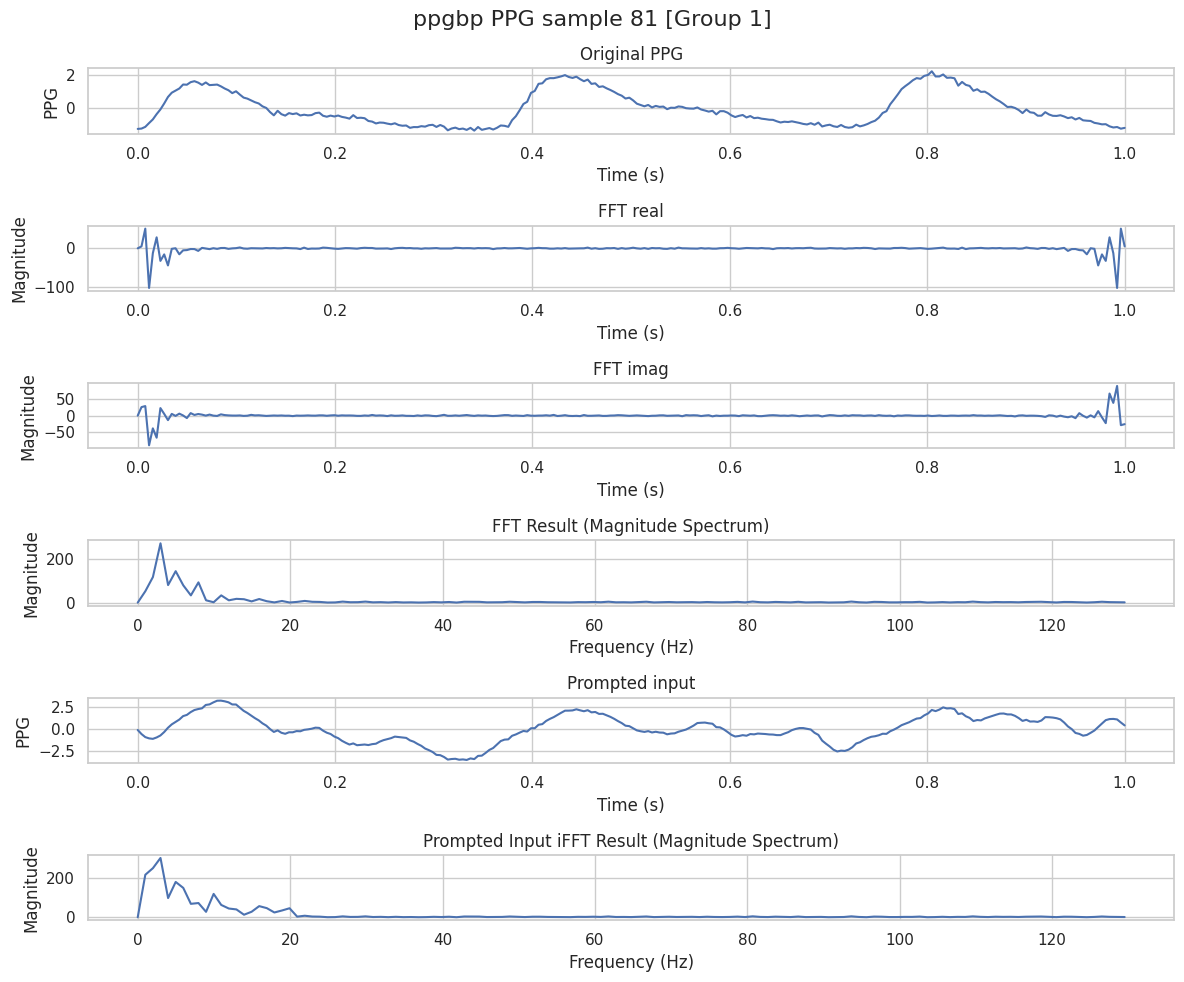

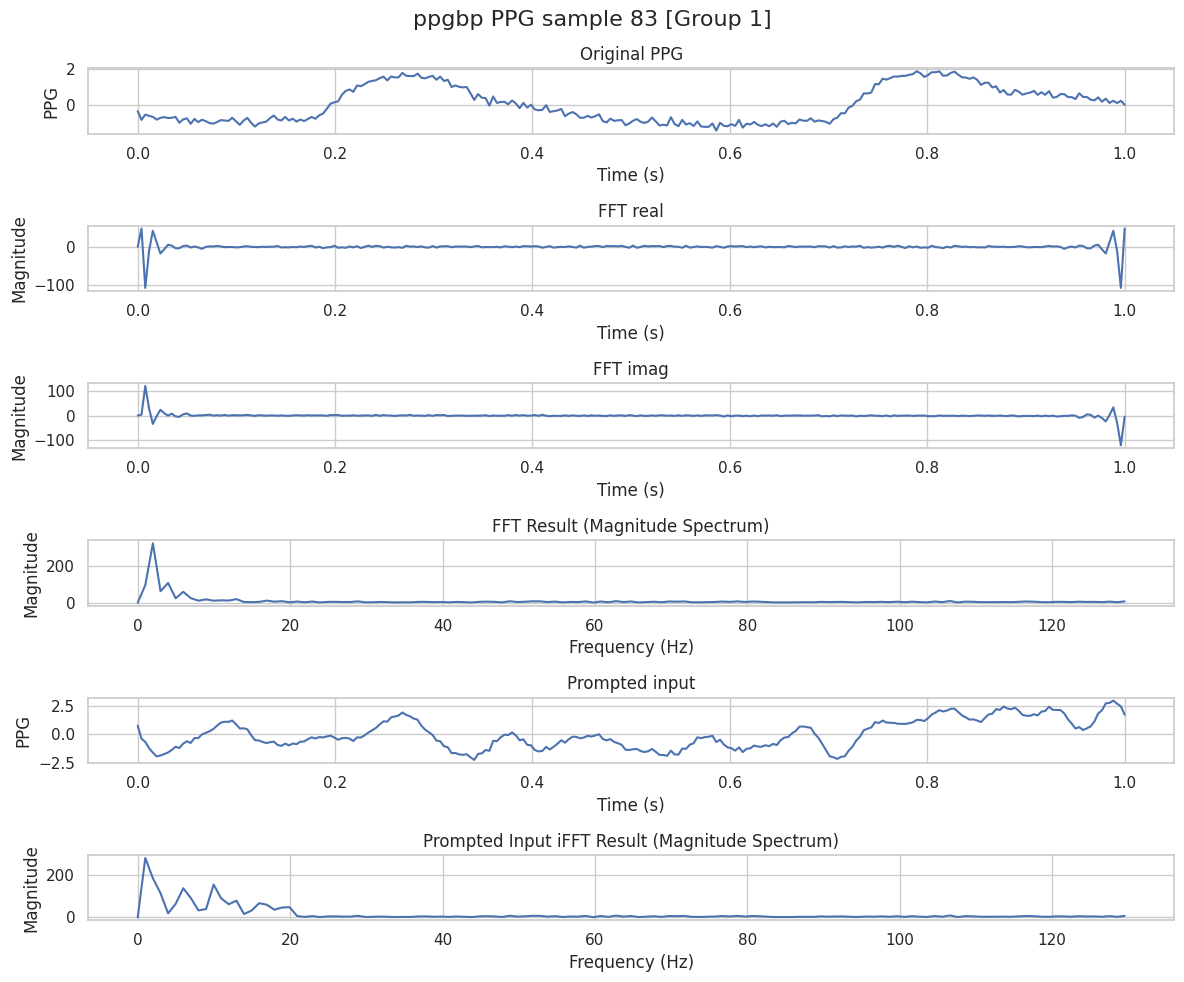

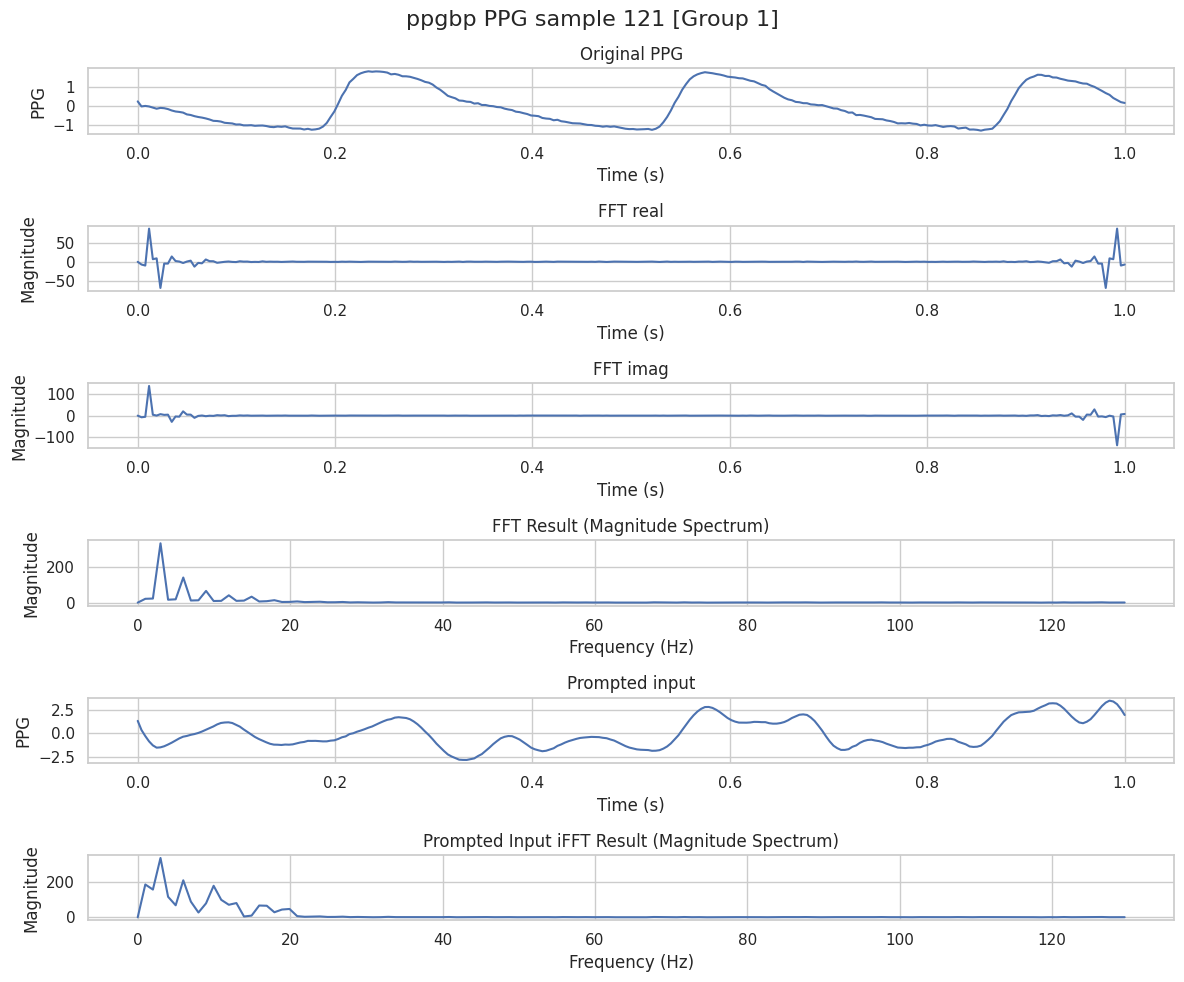

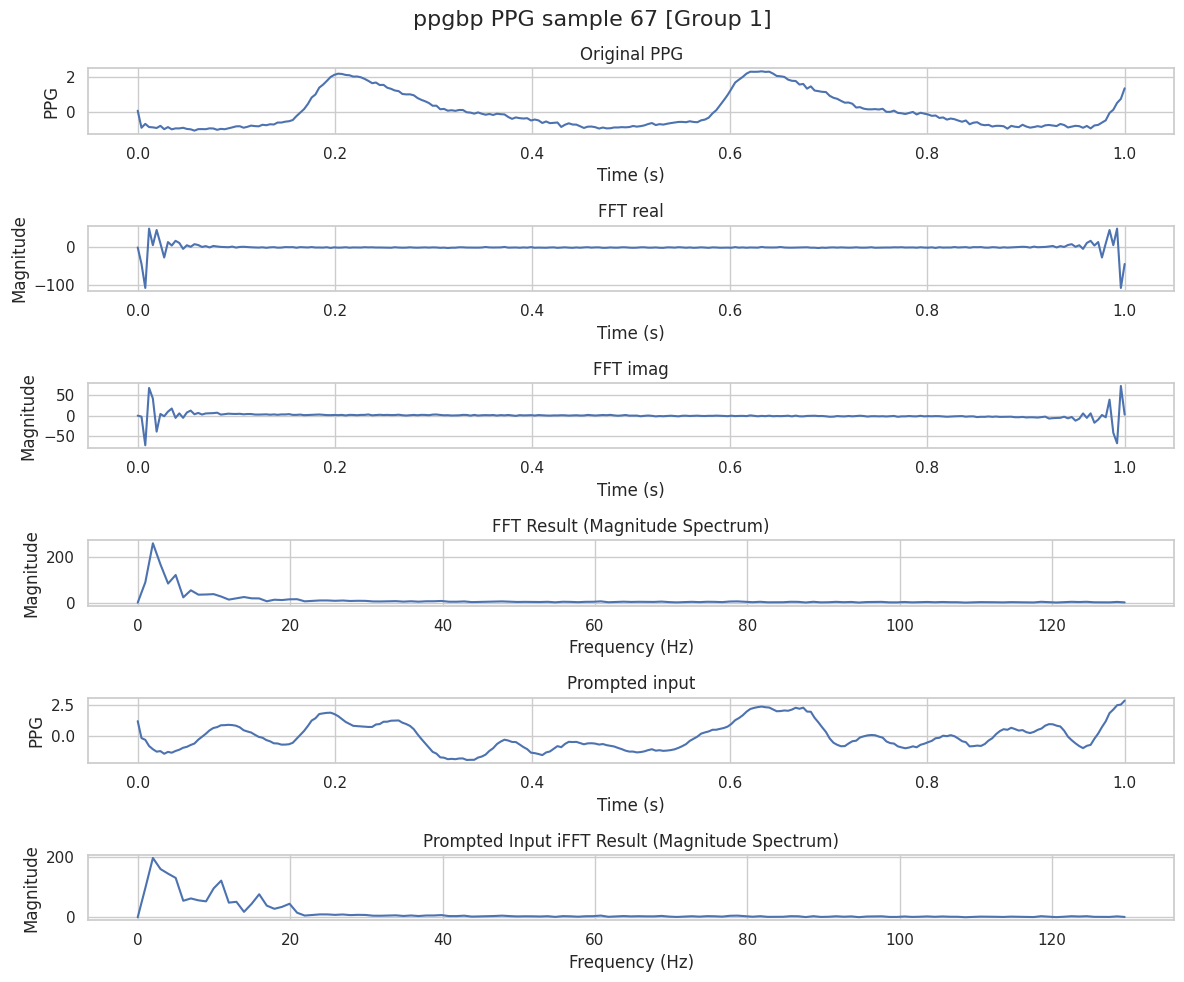

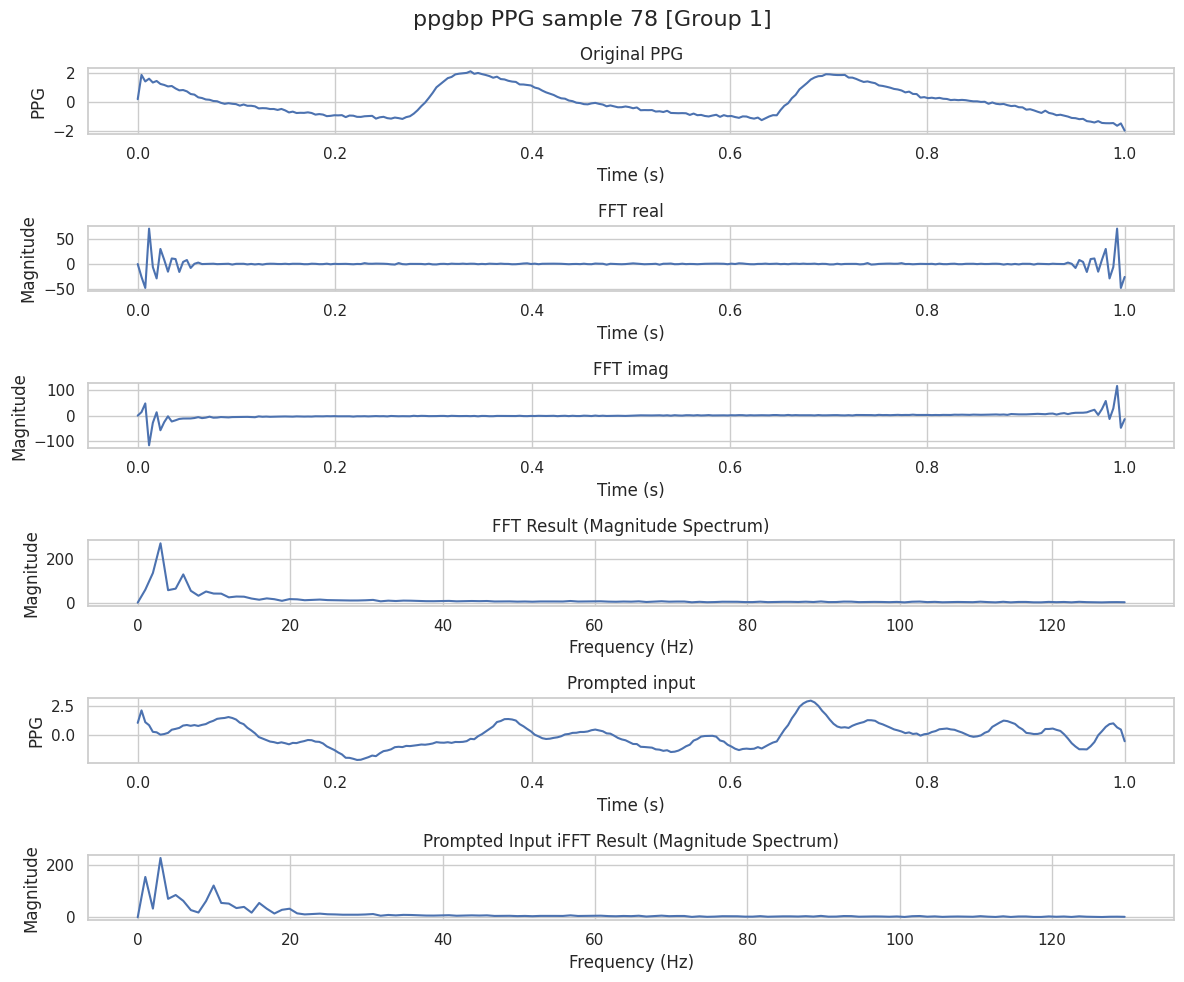

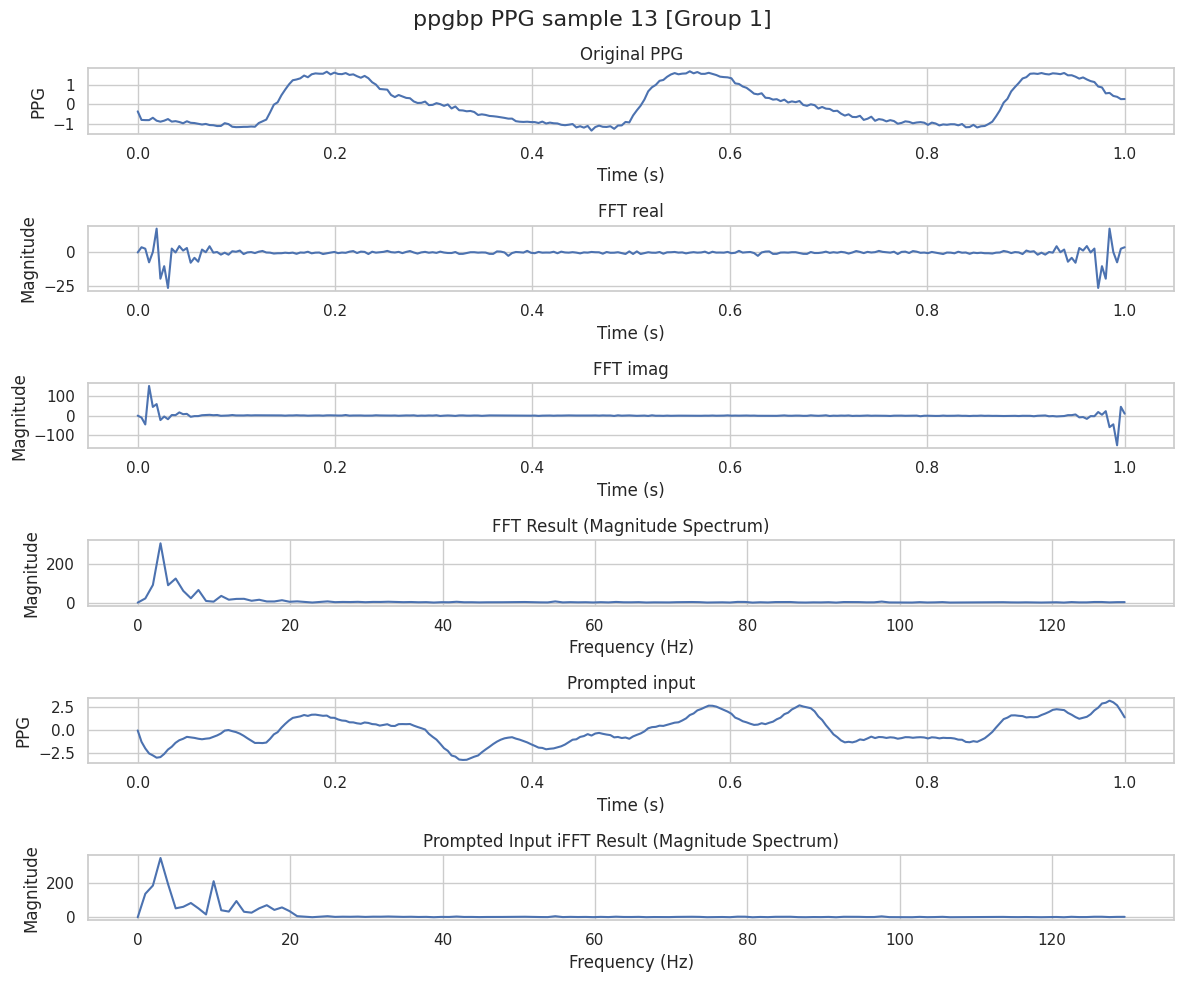

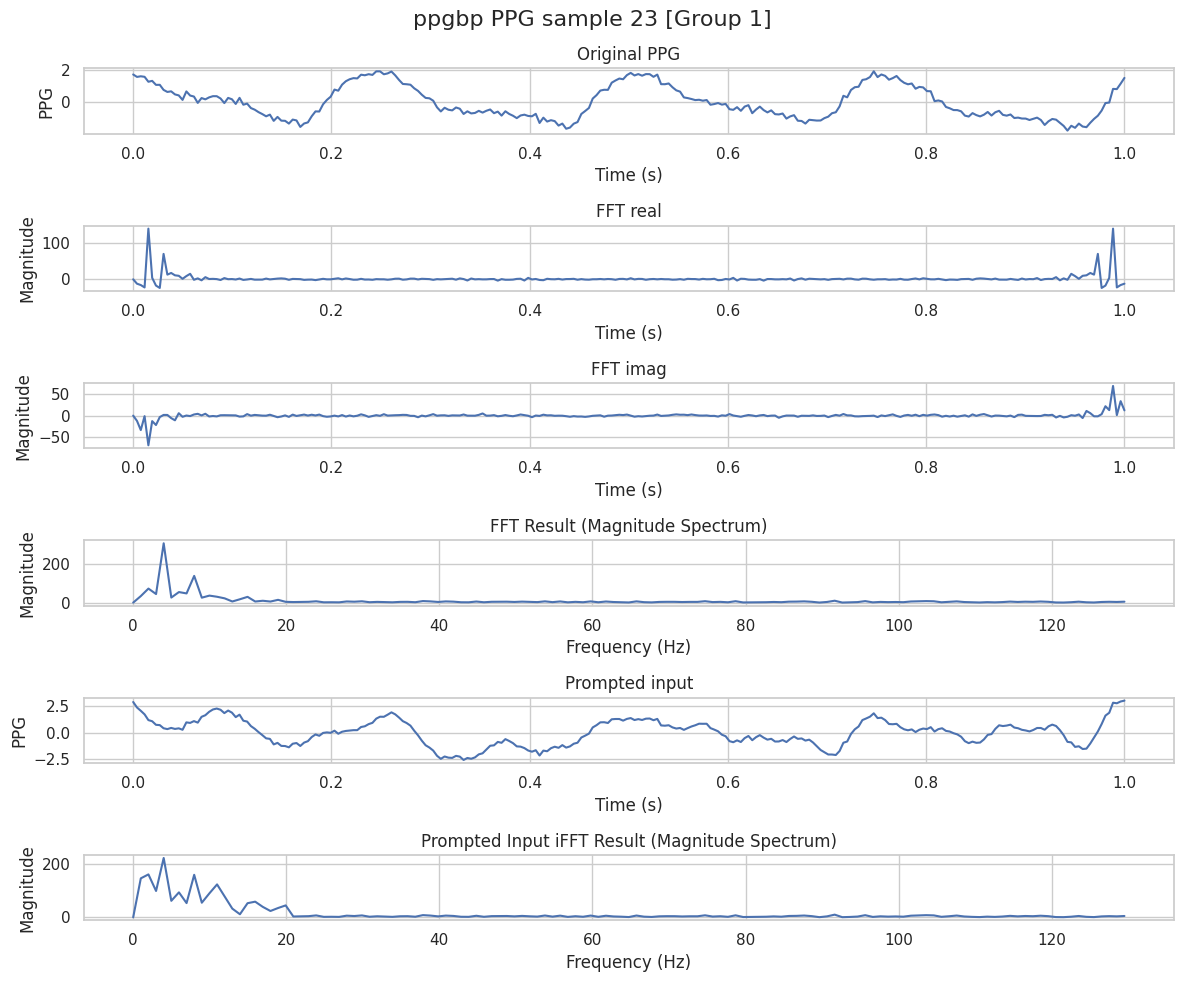

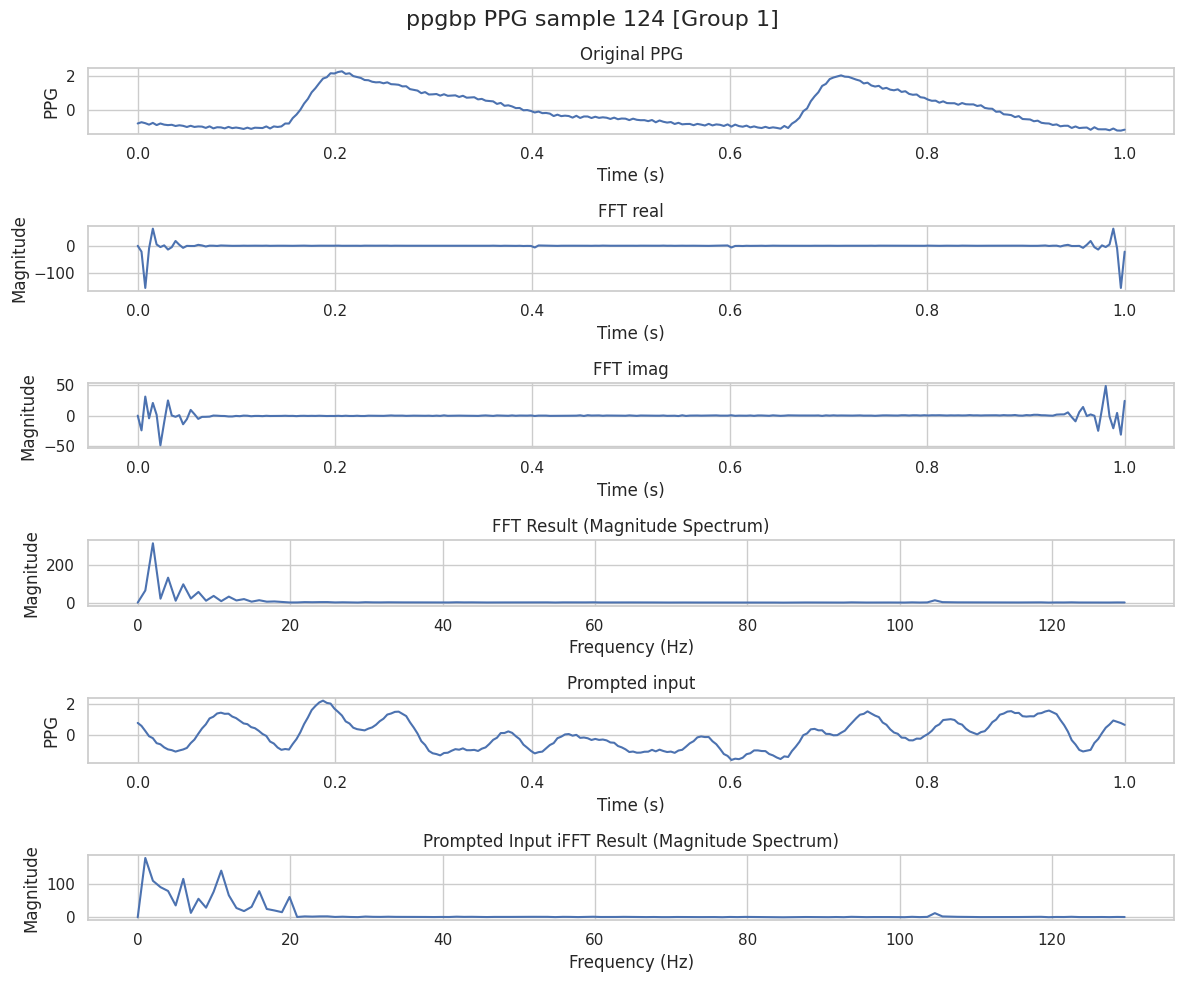

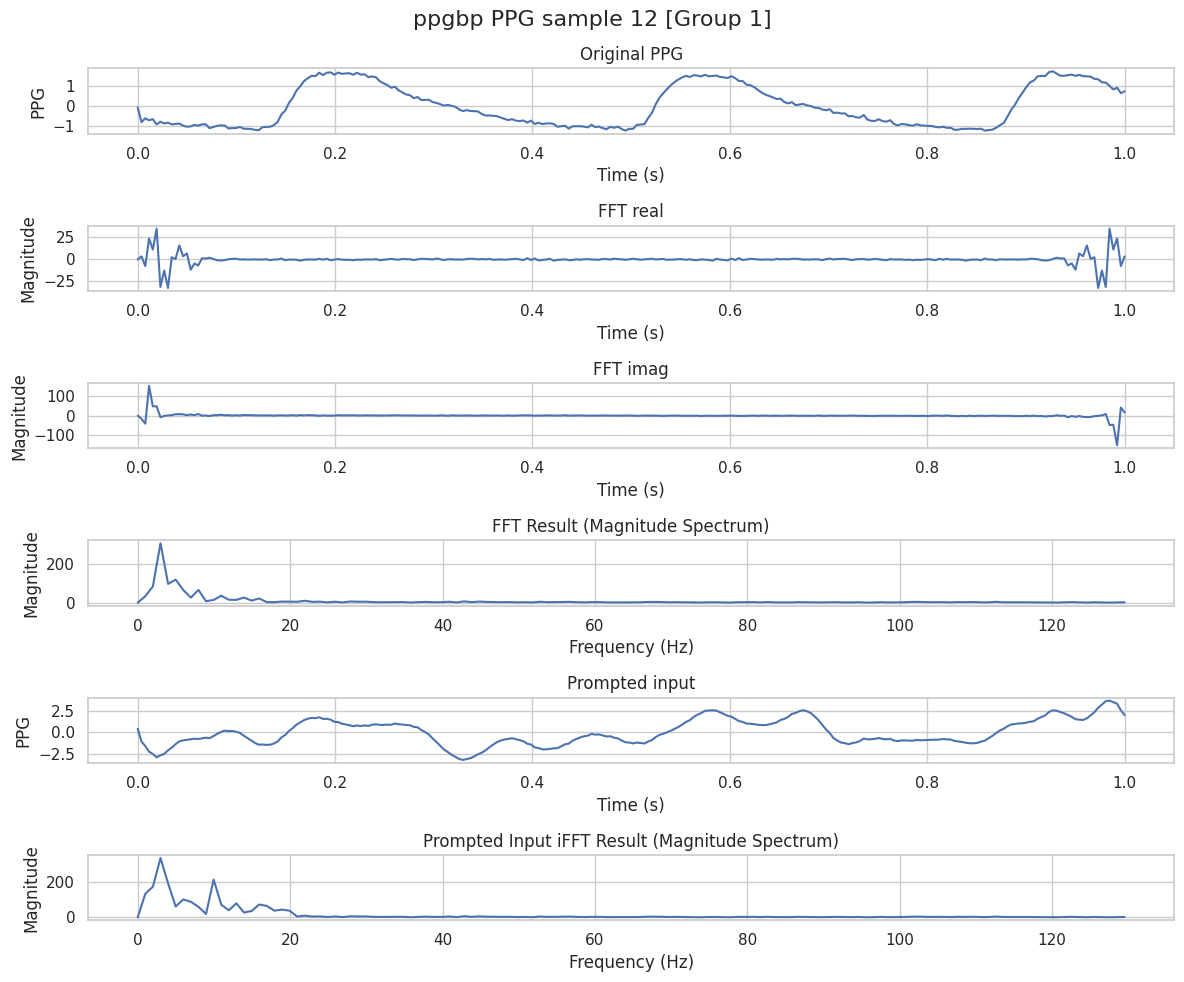

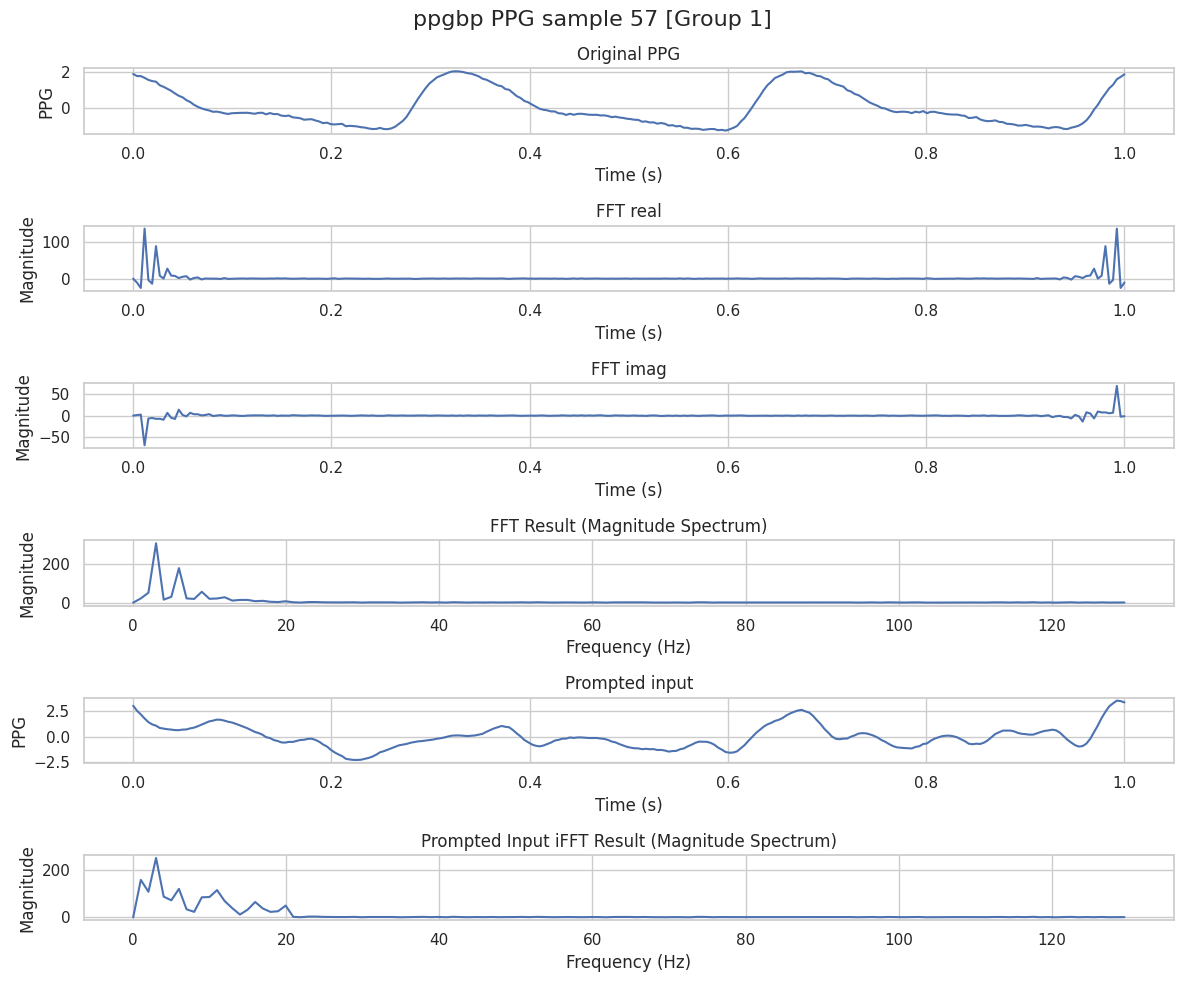

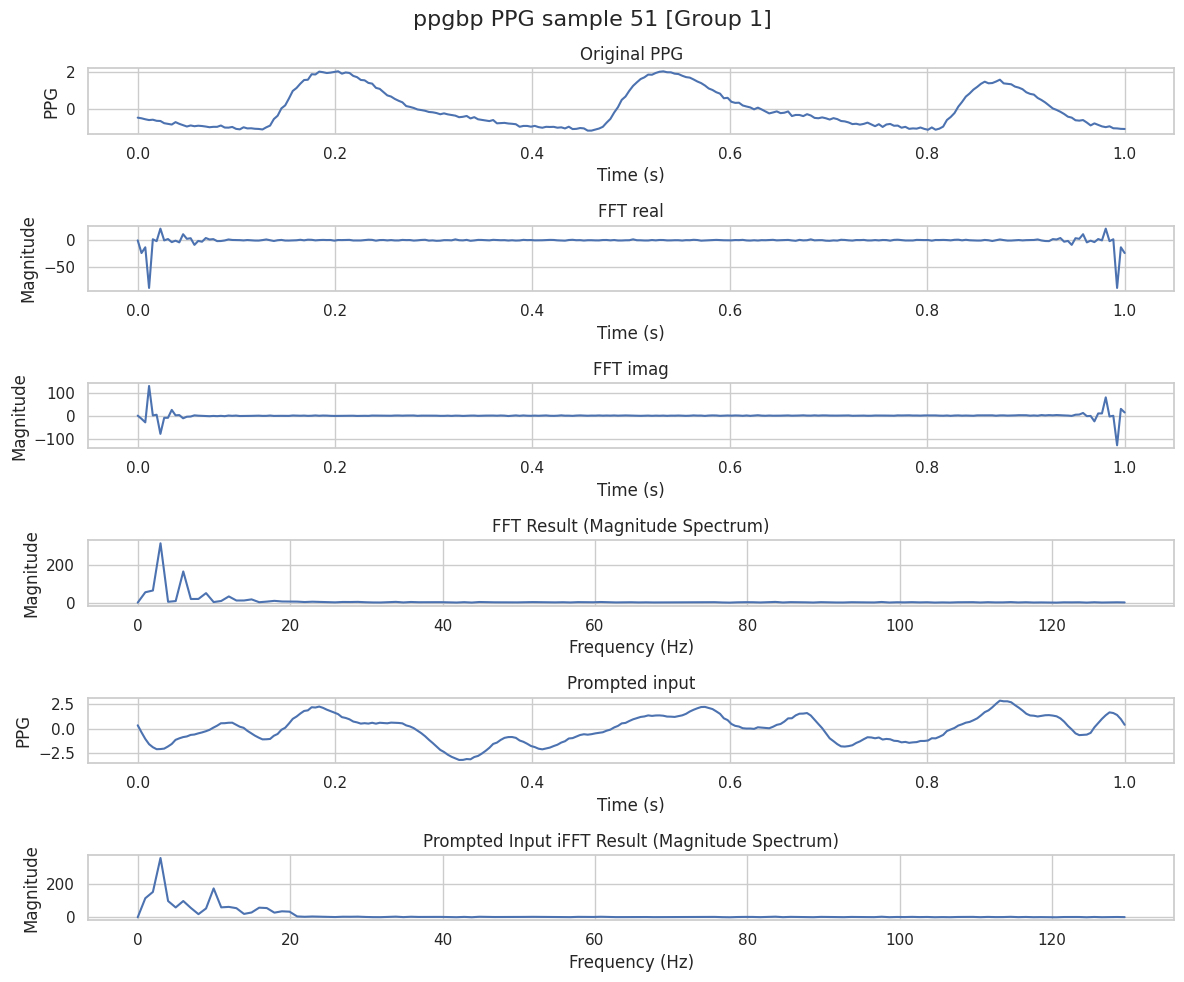

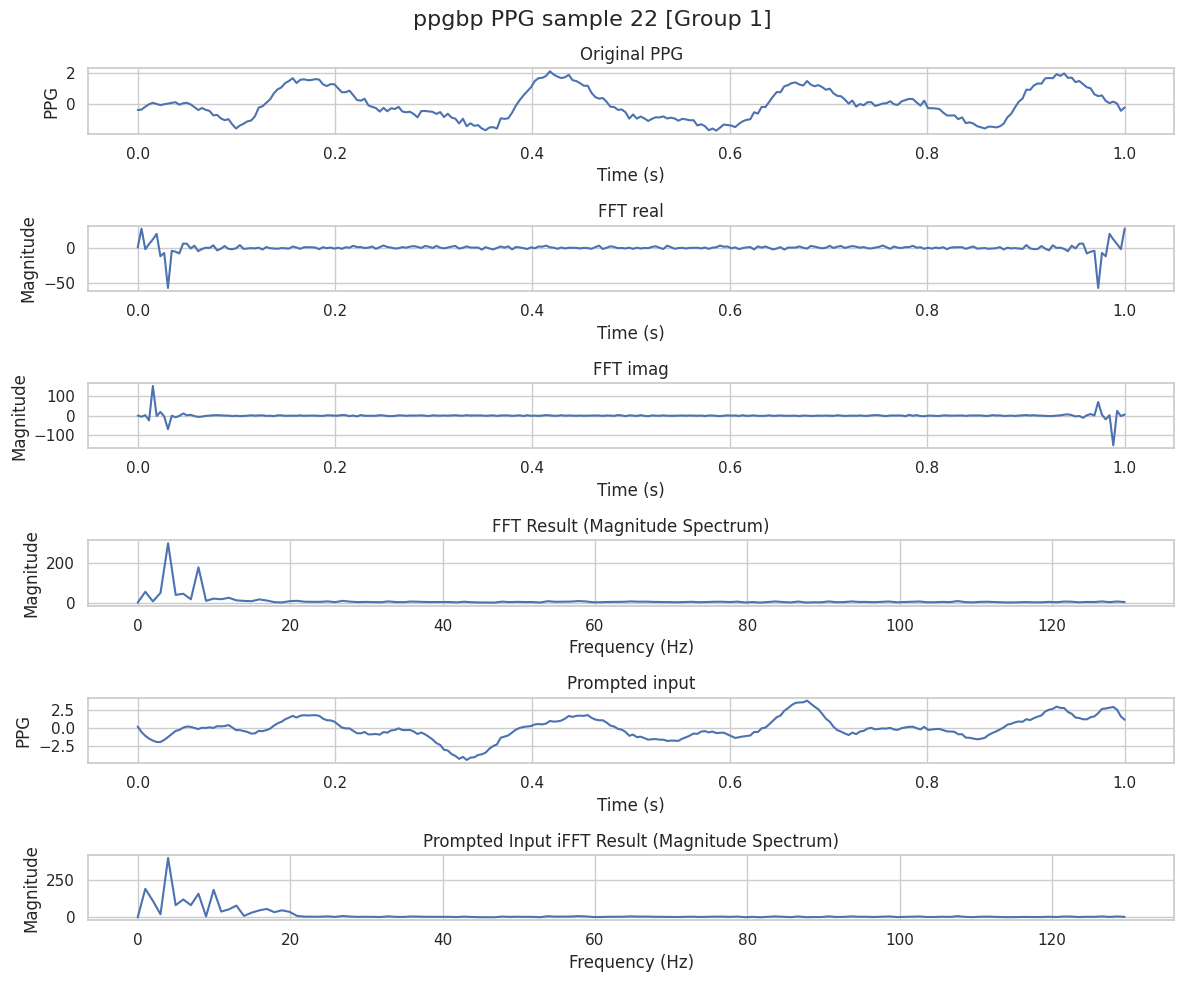

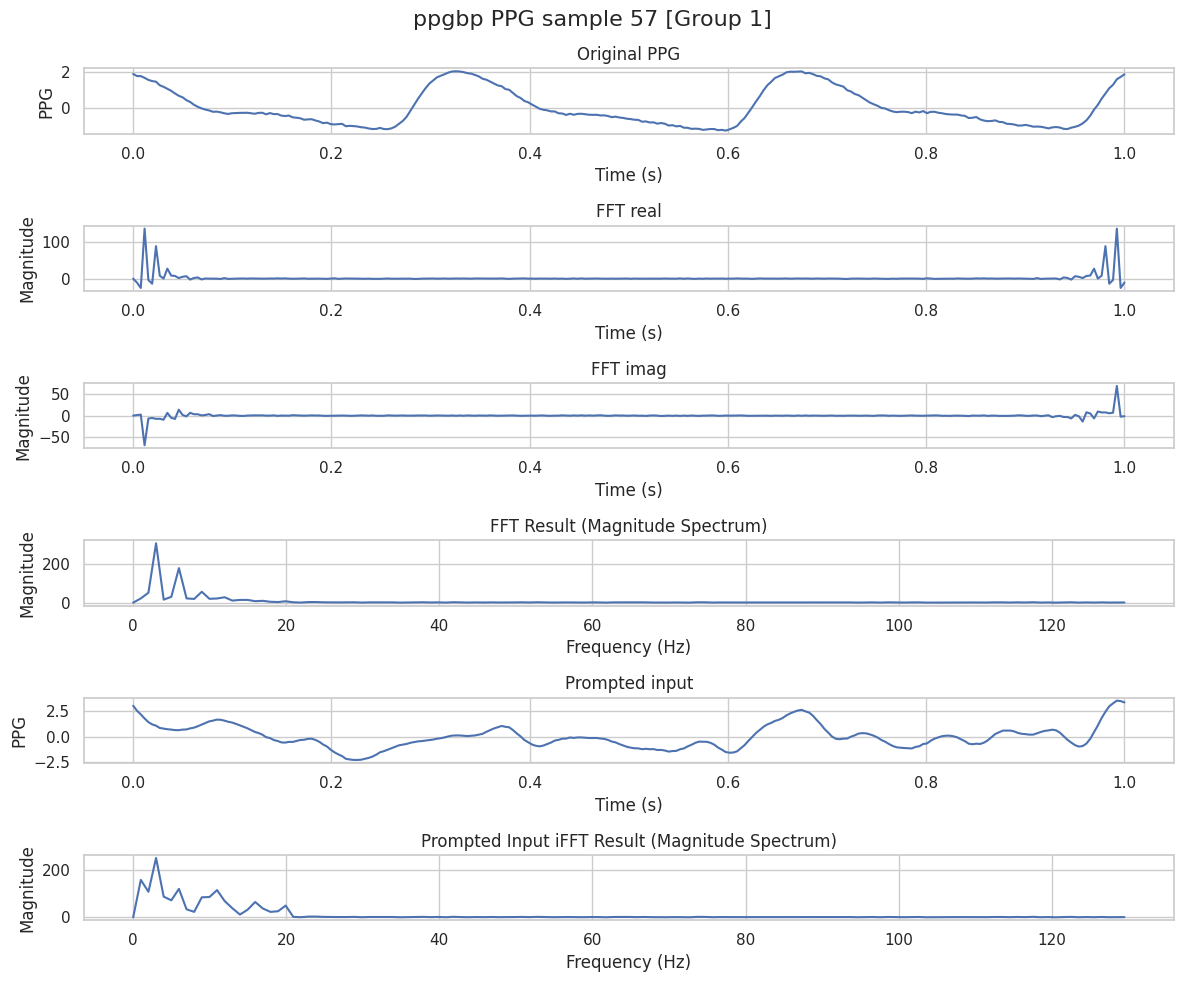

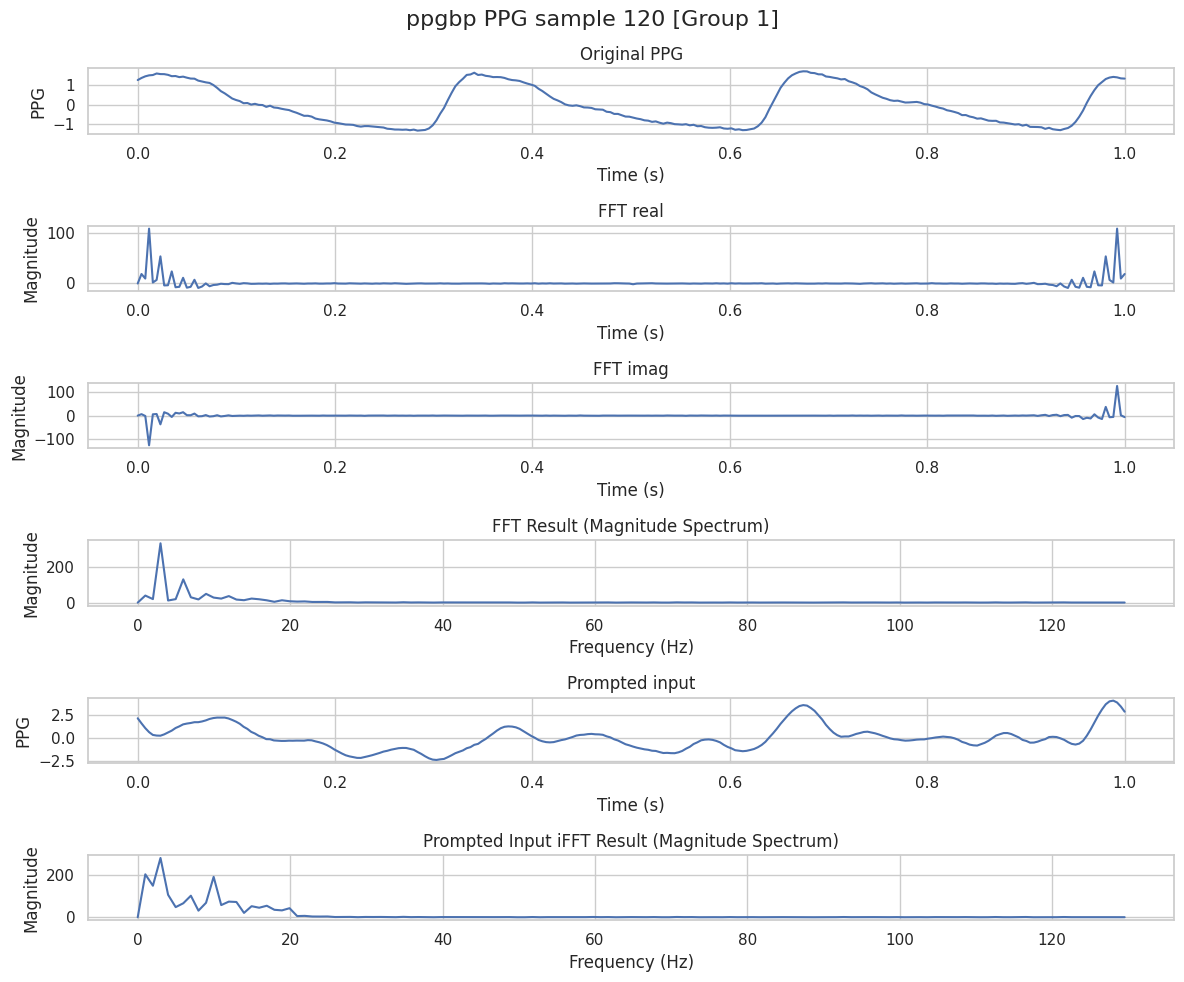

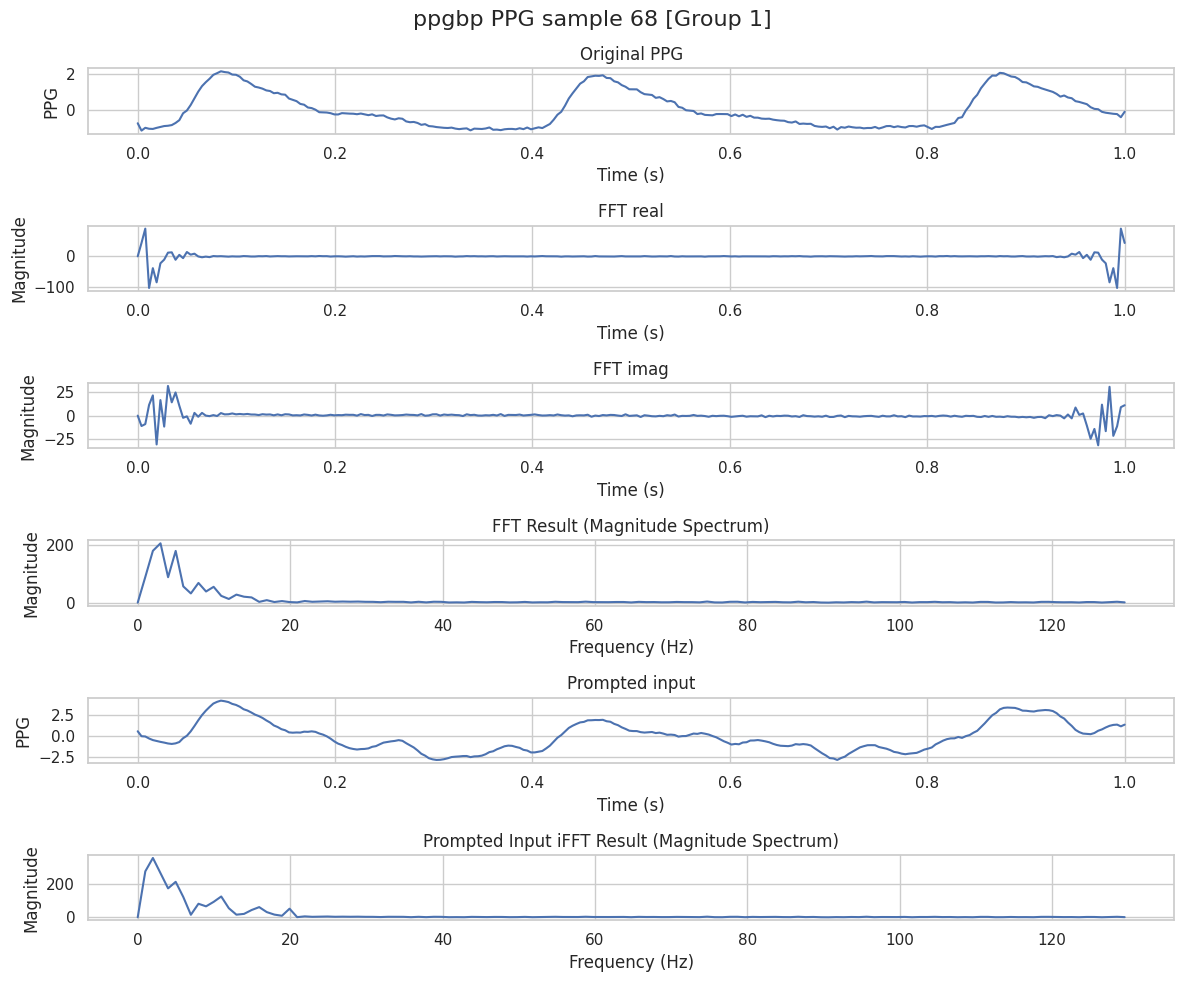

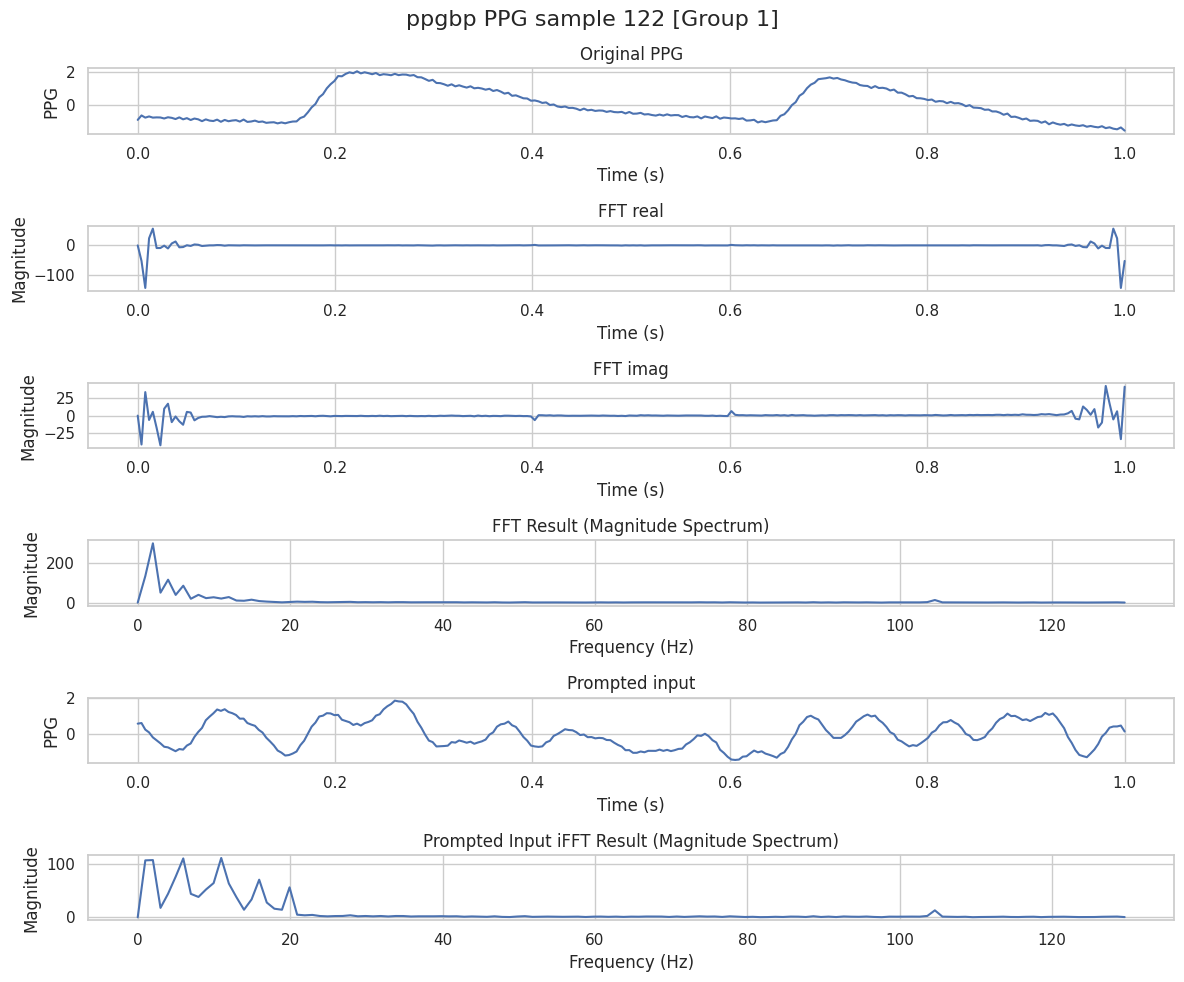

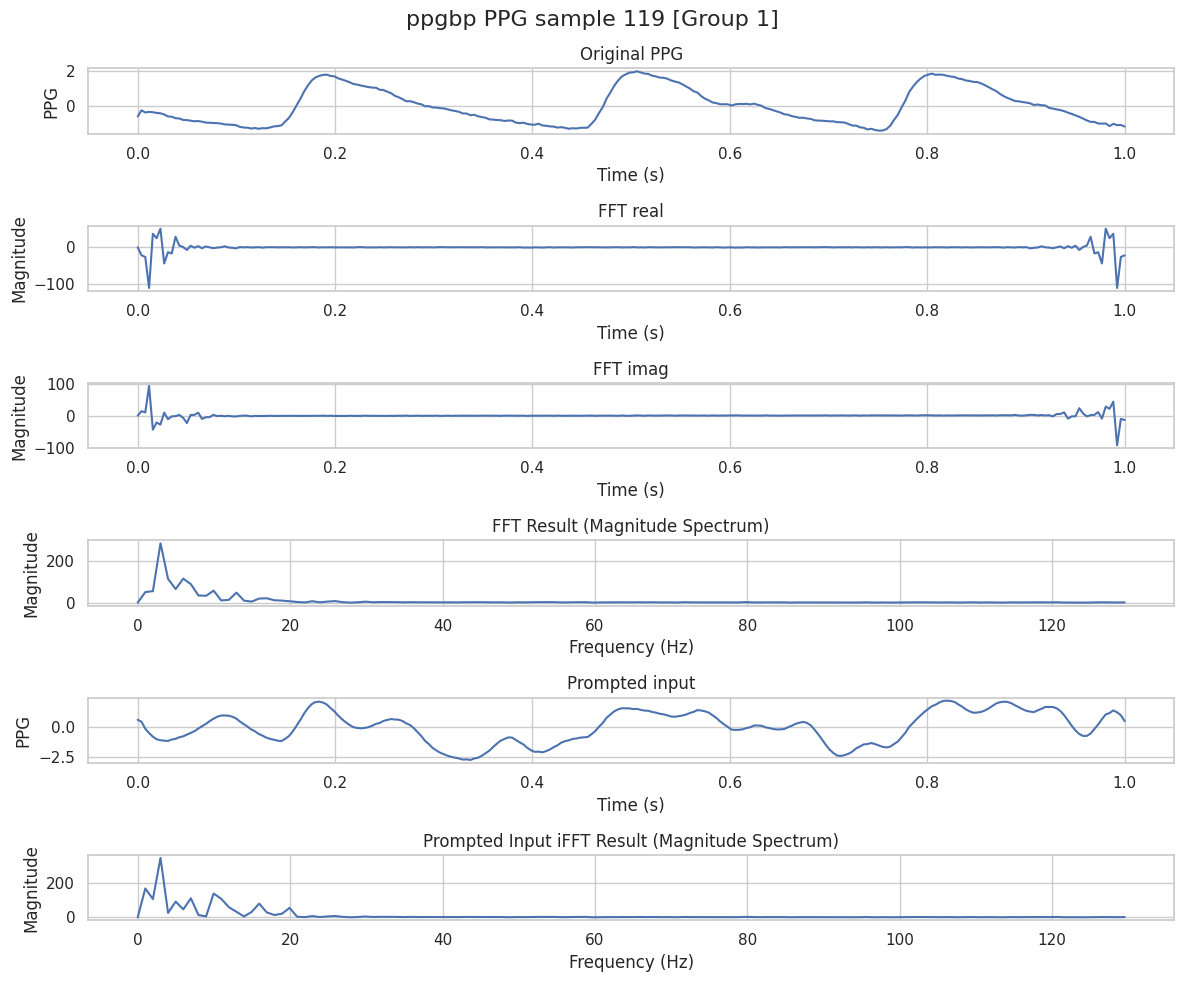

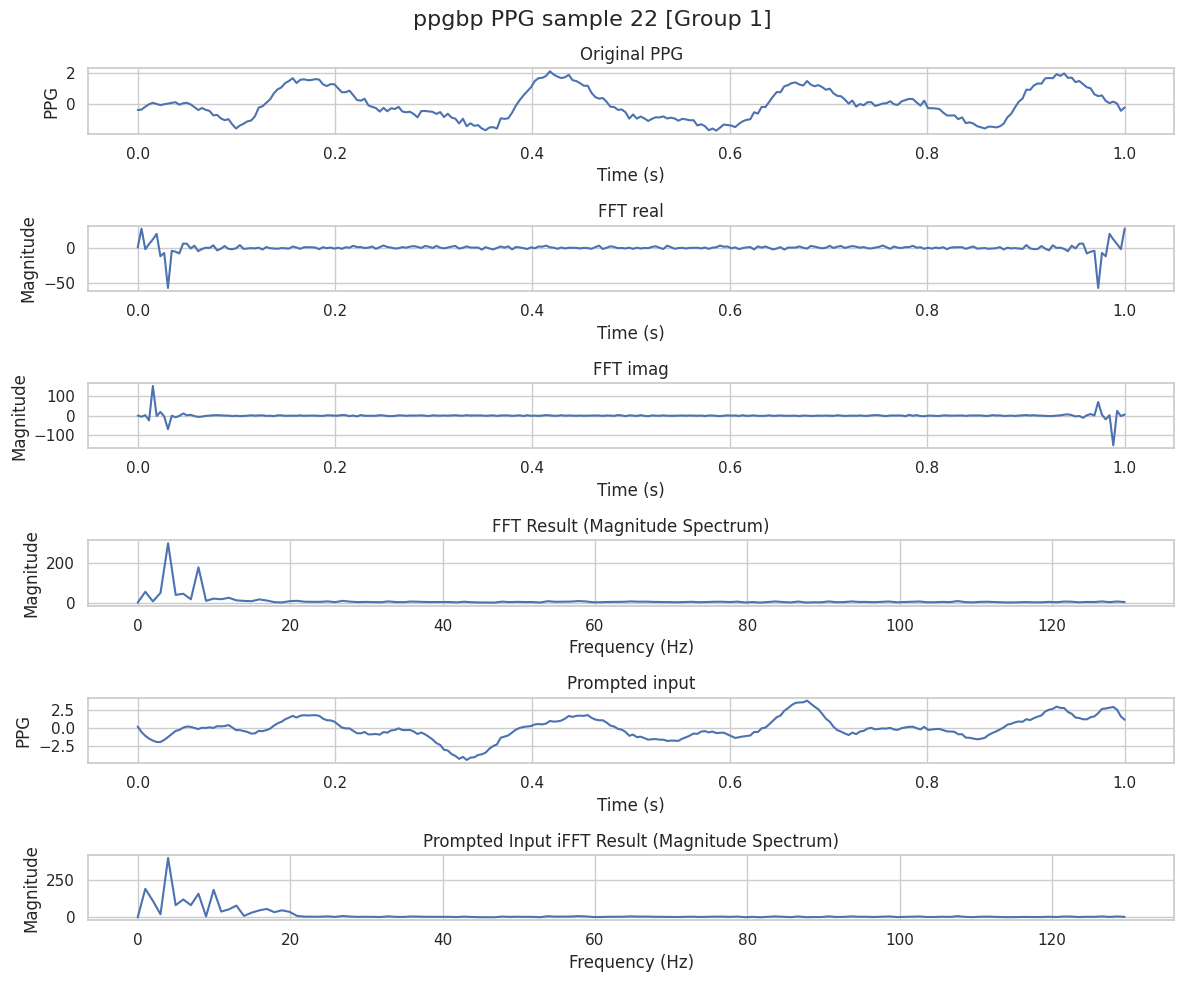

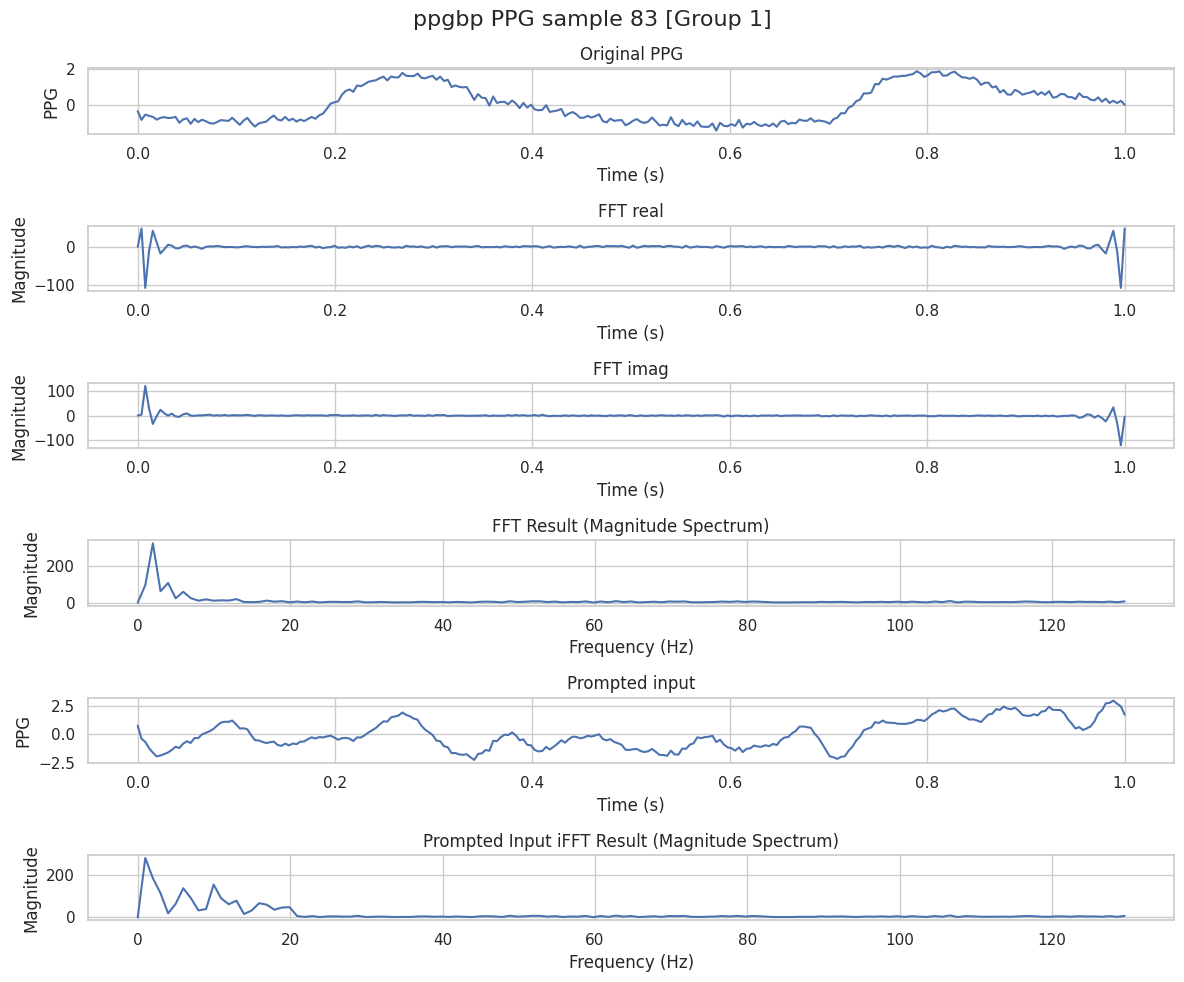

In [692]:
draw_ppg_fft_signal('ppgbp', fold=0, group_num=1, shot=5)

In [308]:
df

fold  group  sbp_error  dpb_error
0         0      3 -12.826889 -16.724476
1         0      2 -10.421494 -12.675034
2         0      1  27.218720   0.020317
3         0      1  28.390960   0.762489
4         0      1   8.609955   0.805878
...     ...    ...        ...        ...
11097     4      1  12.136147   5.549103
11098     4      1  18.462800  -0.934505
11099     4      2   1.080200  -4.032162
11100     4      2   0.717835 -12.546841
11101     4      2  -4.345955 -13.262825

[11102 rows x 4 columns]

In [185]:
fold=0
source = 'bcg'
target = 'sensors'

path = f'../results/errors_{source}_{target}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values
path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

print("Get ", path_embs[0])
hidden_embs = torch.load(path_embs[0], map_location='cpu')
print("Get ", path_embs[1])
prompted_inputs = torch.load(path_embs[1], map_location='cpu')
print("Get ", path_embs[2])
raw_inputs = torch.load(path_embs[2], map_location='cpu')

Fold 0, Group: {0, 1, 2, 3}
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_hidden_embs.pt
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_prompted_inputs.pt
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_raw_inputs.pt


#### tSNE

In [186]:
data_raw = raw_inputs.numpy() if isinstance(raw_inputs, torch.Tensor) else raw_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
raw_embedding = tsne.fit_transform(data_raw)

In [187]:
fft_inputs =  torch.fft.fft(raw_inputs, dim=-1)
fft_real_inputs = fft_inputs.real
fft_img_inputs = fft_inputs.imag

In [188]:
data_fft_real = prompted_inputs.numpy() if isinstance(fft_real_inputs, torch.Tensor) else fft_real_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
fft_real_embedding = tsne.fit_transform(data_fft_real)

In [189]:
data_fft_img = prompted_inputs.numpy() if isinstance(fft_img_inputs, torch.Tensor) else fft_img_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
fft_img_embedding = tsne.fit_transform(data_fft_img)

In [190]:
x_min, x_max = min(raw_embedding[:, 0].min(), fft_real_embedding[:, 0].min(), fft_img_embedding[:, 0].min()), max(raw_embedding[:, 0].max(), fft_real_embedding[:, 0].max(), fft_img_embedding[:, 0].max())
y_min, y_max = min(raw_embedding[:, 1].min(), fft_real_embedding[:, 1].min(), fft_img_embedding[:, 1].min()), max(raw_embedding[:, 1].max(), fft_real_embedding[:, 1].max(), fft_img_embedding[:, 1].max())
x_range = x_max - x_min
y_range = y_max - y_min

In [255]:
def plot_tsne(embs, signal='PPG', g_idx=None):
    # Create a discrete color map with better distinction
    unique_groups = sorted(set(group_ids))
    n_groups = len(unique_groups)
    colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
    color_map = ListedColormap(colors)
    
    # Create the plot with explicit white background
    plt.figure(figsize=(12, 10))
    ax = plt.axes()
    # ax.set_facecolor('white')

    if g_idx == None:
        scatter = plt.scatter(embs[:, 0], embs[:, 1], 
                              c=group_ids, cmap=color_map, 
                              s=70, alpha=0.8, edgecolors='none')
        plt.title('t-SNE Projection of FFT real input', fontsize=16, fontweight='bold')
    else:
        g_list = np.where(group_ids == g_idx)[0]
        scatter = plt.scatter(embs[g_list, 0], embs[g_list, 1], 
                              c=group_ids[g_list], cmap=color_map, 
                              s=70, alpha=0.8, edgecolors='none')
        
        plt.title(f't-SNE Projection of {signal} input in Group {g_idx}', fontsize=16, fontweight='bold')
    
    plt.xlabel('t-SNE1', fontsize=14)
    plt.ylabel('t-SNE2', fontsize=14)
    plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    
    # # Add a color bar
    # cbar = plt.colorbar(scatter, ticks=range(n_groups), 
    #                     label='Group ID', pad=0.02)
    # cbar.set_ticklabels(unique_groups)
    # cbar.ax.tick_params(labelsize=12)
    # cbar.set_label('Group ID', size=14)
    
    # Add a legend with larger markers
    for i, group in enumerate(unique_groups):
        plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
    plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)
    
    plt.tight_layout()
    plt.show()

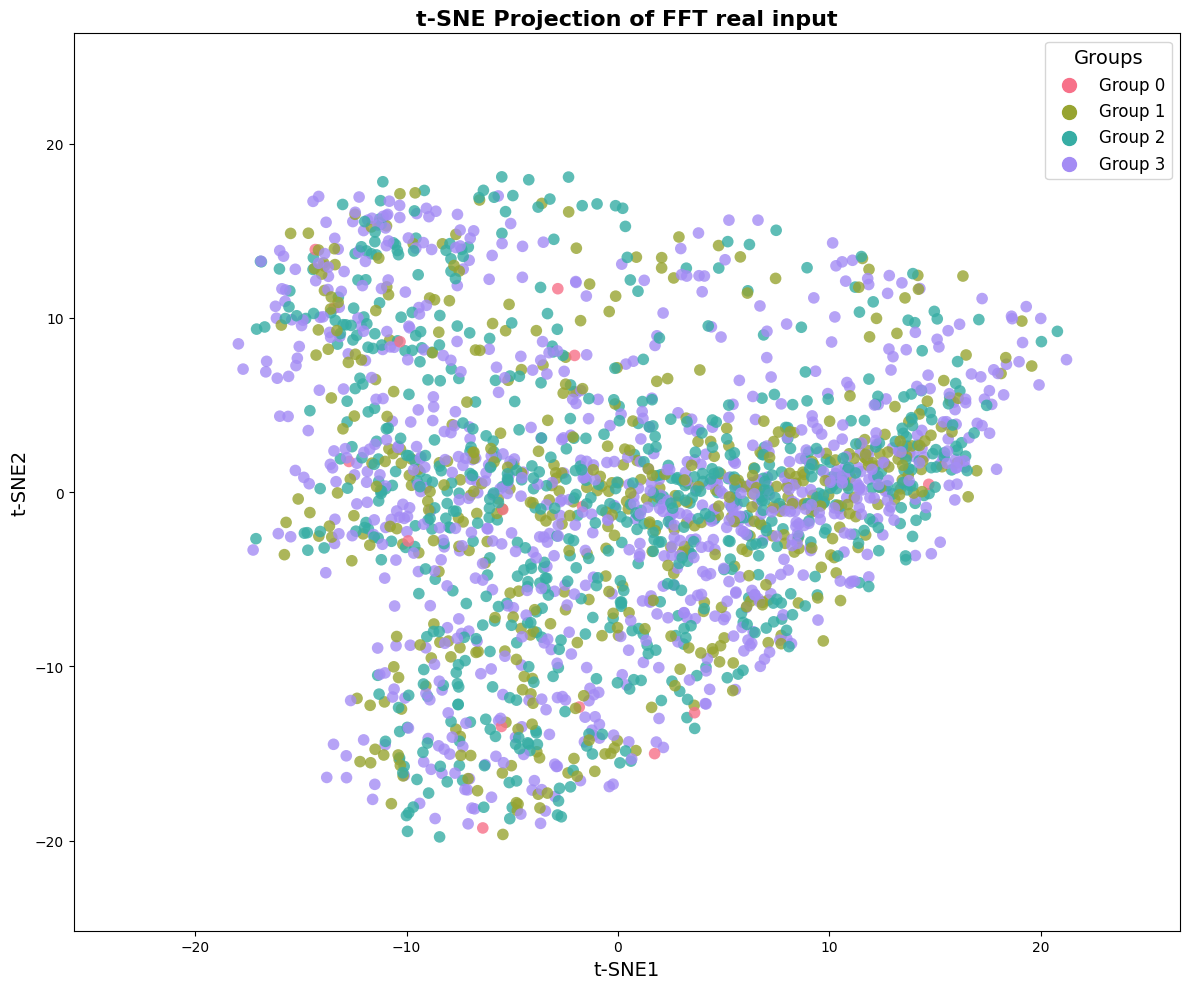

In [248]:
plot_tsne(fft_real_embedding, signal='FFT real', g_idx=None)

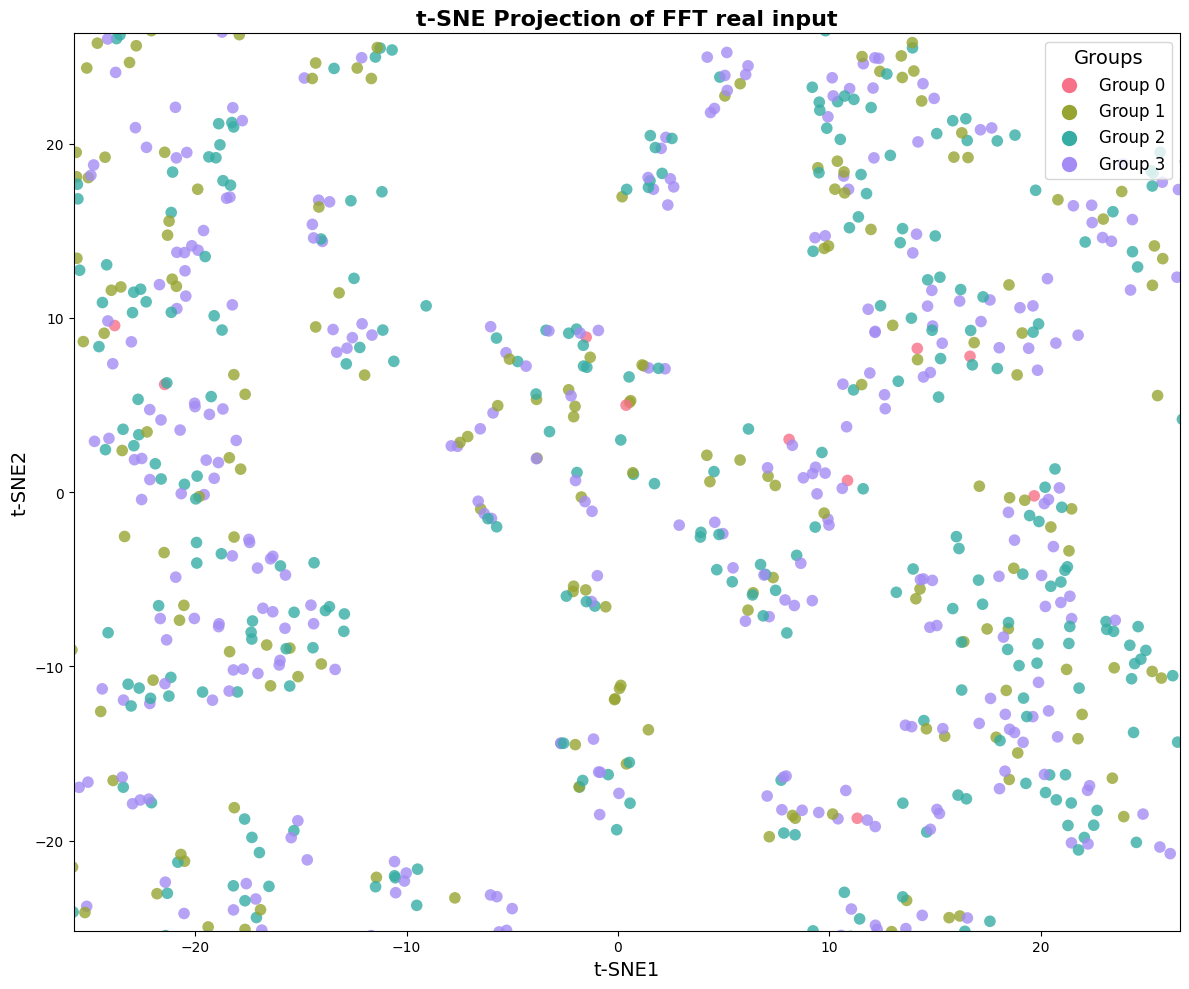

In [249]:
plot_tsne(fft_embedding, signal='PPG', g_idx=None)

## Prompt histogram

In [709]:
fold=0
shot=5
source = 'ppgbp'
target = 'sensors'

In [710]:
path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_shot{shot}_sym_prompt_*.pt")
path_embs = sorted(path_embs)
for p in path_embs:
    print(p)
    
hidden_embs = torch.load(path_embs[0], map_location='cpu')
prompt_hist = torch.load(path_embs[1], map_location='cpu')
prompted_inputs = torch.load(path_embs[2], map_location='cpu')
raw_inputs = torch.load(path_embs[3], map_location='cpu')

../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_hidden_embs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompt_hist.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompted_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_raw_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_hidden_embs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompt_hist.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompted_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_raw_inputs.pt


In [711]:
path = f'../results/errors_{source}_{target}_shot{shot}_train_head_True_sym_True_ours.csv'
print(path)

df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values

path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_shot{shot}_sym_prompt_*.pt")
path_embs = sorted(path_embs)
for p in path_embs:
    print(p)

print(f"Fold {fold}, Group: {set(group_ids)}")


hidden_embs = torch.load(path_embs[0], map_location='cpu')
prompt_hist = torch.load(path_embs[1], map_location='cpu')
prompted_inputs = torch.load(path_embs[2], map_location='cpu')
raw_inputs = torch.load(path_embs[3], map_location='cpu')

../results/errors_ppgbp_sensors_shot5_train_head_True_sym_True_ours.csv
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_hidden_embs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompt_hist.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_prompted_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_False_raw_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_hidden_embs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompt_hist.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_prompted_inputs.pt
../results/embeddings/ppgbp-sensors-prompt_global_fold0_shot5_sym_prompt_True_train_head_True_raw_inputs.pt
Fold 0, Group: {0, 1, 2, 3}


In [714]:
num_prompt = max(torch.unique(prompt_hist)).item()

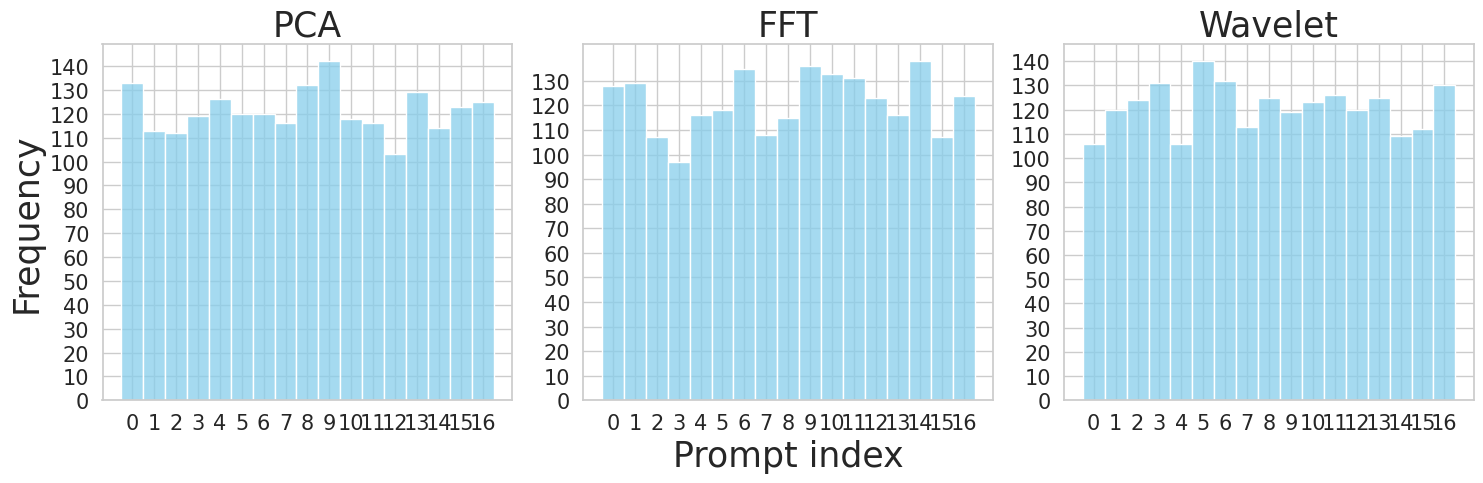

In [720]:
num_prompt = max(torch.unique(prompt_hist)).item()

sns.set(style="whitegrid")

col_name = ['PCA', 'FFT', 'Wavelet']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    _dict=dict((k,len(torch.where(prompt_hist[:,i]==k)[0])) for k in range(num_prompt))
    max_count = sorted(_dict.items(), key=lambda x: x[1], reverse=True)[0][1]
    sns.histplot(prompt_hist[:, i].numpy(), bins=range(num_prompt+2), kde=False, color='skyblue', ax=axs[i])
    axs[i].set_title(f'{col_name[i]}', fontsize=25)
    
    if i == 0:
        axs[i].set_ylabel('Frequency', fontsize=25)
    else:
        axs[i].set_ylabel('', fontsize=25)
    if i == 1:
        axs[i].set_xlabel('Prompt index', fontsize=25)
    else:
        axs[i].set_xlabel('', fontsize=25)
        
    axs[i].set_yticks(range(0, max_count+1, 10))
    axs[i].set_xticks(ticks=[x + 0.5 for x in range(num_prompt+1)], labels=range(num_prompt+1), fontsize=15)
    axs[i].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig(f'./figures/{source}_{target}_fold{fold}_shot{shot}_histogram_plots.png', bbox_inches='tight', dpi=300)  # Adjust the file path and DPI as needed
plt.show()

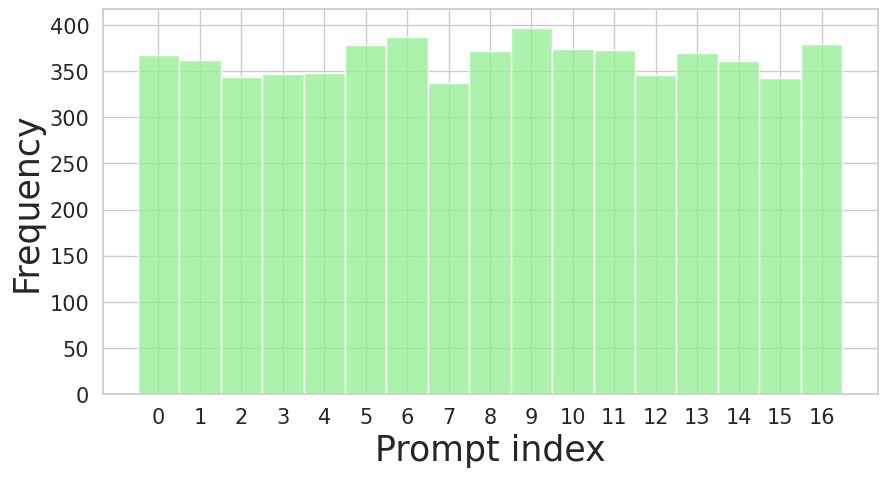

In [721]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(prompt_hist.numpy().flatten(), bins=range(num_prompt+2), kde=False, color='lightgreen')
# plt.title('All Data', fontsize=16)
plt.xlabel('Prompt index', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(ticks=[x + 0.5 for x in range(num_prompt+1)], labels=range(num_prompt+1), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

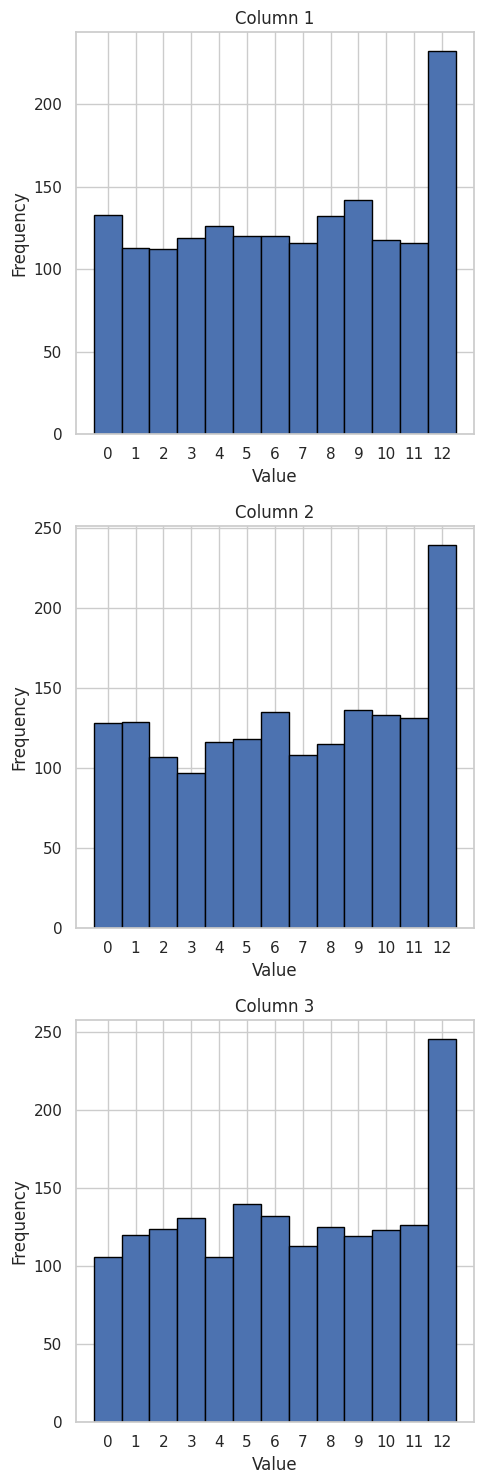

In [722]:
# Plot histograms for each column
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

for i in range(3):
    axs[i].hist(prompt_hist[:, i].numpy(), bins=range(14), edgecolor='black', align='left')
    axs[i].set_title(f'Column {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks(range(13))

plt.tight_layout()
plt.show()

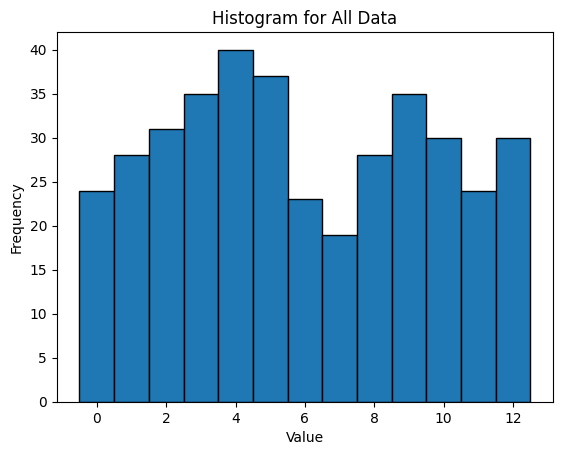

In [53]:
# 전체 30개 샘플에 대해서 histogram 그리기
plt.figure()
plt.hist(prompt_hist.numpy().flatten(), bins=range(14), edgecolor='black', align='left')
plt.title('Histogram for All Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Embedding Analysis

In [828]:
fold=2
shot=5
train_head='True'
source = 'ppgbp'
target = 'bcg'

#### Meta data

In [829]:
data_path = f'../../../../l2p_baseline/code/train/results/dataset/{target}_fold{fold}_test_data.csv'
df_meta = pd.read_csv(data_path)
print("Num of unique Patient: ", df_meta.patient.nunique())
df_meta.describe()

Num of unique Patient:  8


index          SP          DP         Age   Height_cm   Weight_kg  \
count  652.00000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean   325.50000  119.239674   68.405798   37.036810  169.253067   66.522699   
std    188.36047    9.849974    7.820087   13.406736    8.172727   10.845335   
min      0.00000   98.319950   48.452073   22.000000  157.000000   53.700000   
25%    162.75000  114.442588   62.898713   22.000000  164.600000   58.100000   
50%    325.50000  119.132414   67.048621   36.000000  171.600000   67.500000   
75%    488.25000  124.562571   74.795008   42.000000  173.000000   75.600000   
max    651.00000  148.525949   89.143028   65.000000  183.600000   88.800000   

            group  
count  652.000000  
mean     1.541411  
std      0.528572  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      3.000000

#### Draw tSNE

In [844]:
path = f'../results/../results/errors_{source}_{target}_shot{shot}_train_head_False_sym_{train_head}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values
# # Offical
# path_embs = glob(f"{source}-{target}*_fold{foldIdx}_shot{shot}_sym_prompt_True_train_head_{train_head}_*.pt")

# Temporal
path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_shot{shot}_sym_prompt_True_train_head_{train_head}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

ss_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{source}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
ss_embs = torch.load(ss_path[0], map_location='cpu')

tt_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{target}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
tt_embs = torch.load(tt_path[0], map_location='cpu')

st_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
st_embs = torch.load(st_path[0], map_location='cpu')

print("Get ", path_embs[0])
hidden_embs = torch.load(path_embs[0], map_location='cpu')

Fold 2, Group: {1, 2, 3}
Get  ../results/embeddings/ppgbp-bcg-prompt_global_fold2_shot5_sym_prompt_True_train_head_True_hidden_embs.pt


In [845]:
path_embs

['../results/embeddings/ppgbp-bcg-prompt_global_fold2_shot5_sym_prompt_True_train_head_True_hidden_embs.pt',
 '../results/embeddings/ppgbp-bcg-prompt_global_fold2_shot5_sym_prompt_True_train_head_True_prompt_hist.pt',
 '../results/embeddings/ppgbp-bcg-prompt_global_fold2_shot5_sym_prompt_True_train_head_True_prompted_inputs.pt',
 '../results/embeddings/ppgbp-bcg-prompt_global_fold2_shot5_sym_prompt_True_train_head_True_raw_inputs.pt']

In [849]:
print(len(ss_embs), len(st_embs), len(hidden_embs))

min_count = min(len(ss_embs), len(st_embs), len(hidden_embs))

indices = torch.randint(0, len(ss_embs), (min_count,))
ss_embs_min = ss_embs[indices]

indices = torch.randint(0, len(st_embs), (min_count,))
st_embs_min = st_embs[indices]

indices = torch.randint(0, len(hidden_embs), (min_count,))
hidden_embs_min = hidden_embs[indices]

129 652 652


In [850]:
total_embedding = torch.cat((ss_embs_min, st_embs_min, hidden_embs_min))
labels=[0]*len(ss_embs_min) + [1]*len(st_embs_min) + [2]*len(hidden_embs_min)

In [851]:
ss_embs_min.shape, st_embs_min.shape, hidden_embs_min.shape

(torch.Size([129, 64]), torch.Size([129, 64]), torch.Size([129, 64]))

In [808]:
label_name = ['ZS(S->S)', 'ZS(S->T)', 'Ours']

In [809]:
data = total_embedding.numpy() if isinstance(total_embedding, torch.Tensor) else total_embedding
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

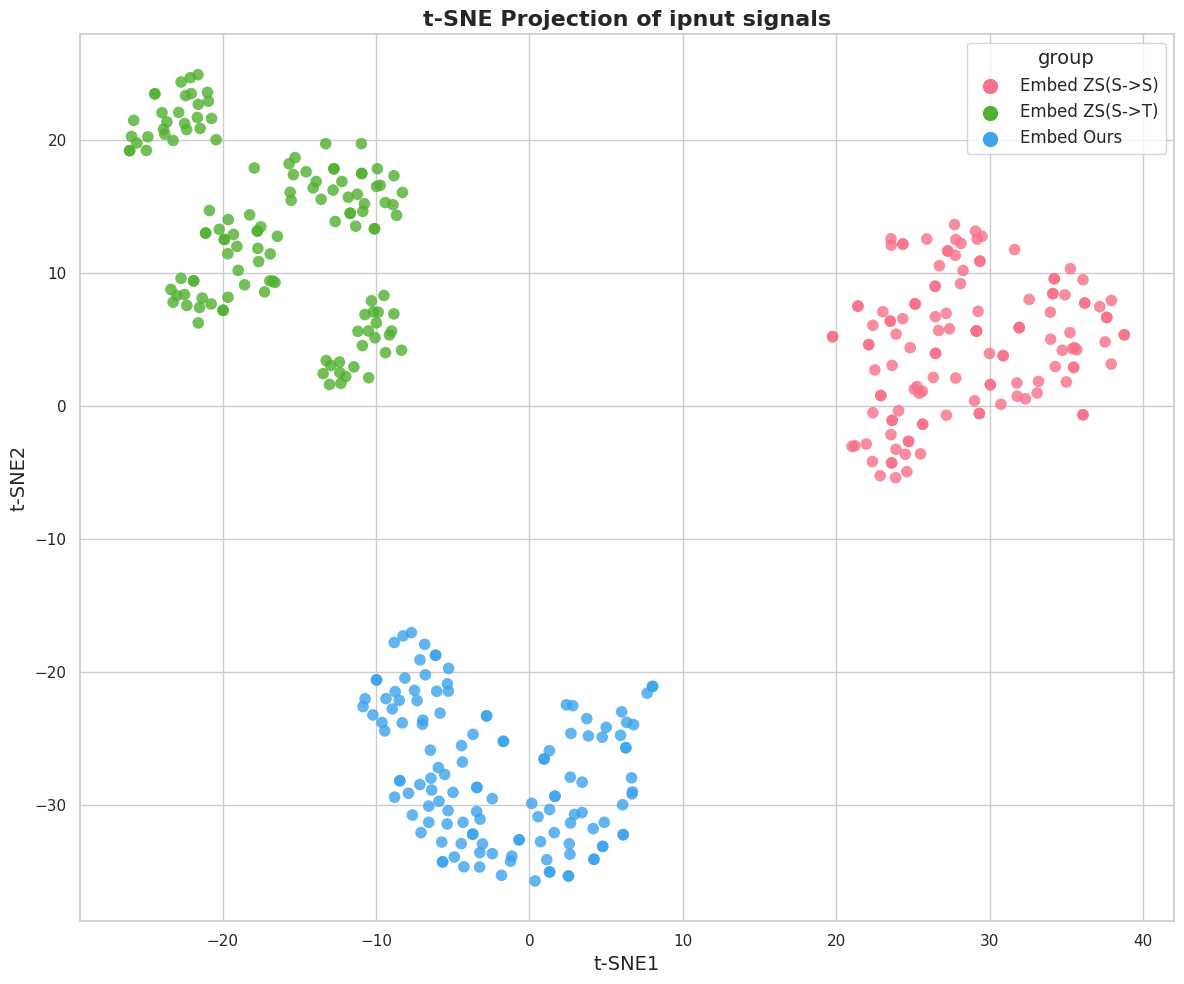

In [813]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(labels))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()

scatter = plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], 
                      c=[unique_groups.index(label) for label in labels], cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title('t-SNE Projection of ipnut signals', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Embed {label_name[i]}')
plt.legend(title="group", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()

### Source to Target
Prompted input은 source backbone input이니까 source signal에 가까우면 좋지 않을까?

In [908]:
fold=3
shot=10
train_head='True'
source = 'ppgbp'
target = 'bcg'

In [909]:
path = f'../results/../results/errors_{source}_{target}_shot{shot}_train_head_False_sym_{train_head}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values

path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_shot{shot}_sym_prompt_True_train_head_{train_head}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

print("Get ", path_embs[0])
prompted_input = torch.load(path_embs[2], map_location='cpu')
target_input  = torch.load(path_embs[3], map_location='cpu')

# Get source input
path_embs = glob(f"../results/embeddings/{target}-{source}*_fold{fold}_shot{shot}_sym_prompt_True_train_head_{train_head}_raw_inputs.pt")
source_input = torch.load(path_embs[0], map_location='cpu')

Fold 3, Group: {0, 1, 2}
Get  ../results/embeddings/ppgbp-bcg-prompt_global_fold3_shot10_sym_prompt_True_train_head_True_hidden_embs.pt


In [910]:
print(len(source_input), len(target_input), len(prompted_input))

min_count = min(len(source_input), len(target_input), len(prompted_input))

indices = torch.randint(0, len(source_input), (min_count,))
source_input_min = source_input[indices]

indices = torch.randint(0, len(target_input), (min_count,))
target_input_min = target_input[indices]

indices = torch.randint(0, len(prompted_input), (min_count,))
prompted_input_min = prompted_input[indices]

124 557 557


In [911]:
print(len(source_input_min), len(target_input_min), len(prompted_input_min))

124 124 124


In [912]:
labels=[0]*len(source_input_min) + [1]*len(target_input_min) + [2]*len(prompted_input_min)

In [913]:
label_name = ['source signal', 'target signal', 'prompted signal']

In [914]:
def align_embeddings(embeddings, target_dim):
    # Convert tensors to numpy arrays if they're not already
    numpy_embeddings = [e.numpy() if isinstance(e, torch.Tensor) else e for e in embeddings]
    
    # Determine the minimum dimension across all embeddings
    min_dim = min(e.shape[1] for e in numpy_embeddings)
    
    # If target_dim is larger than min_dim, set it to min_dim
    target_dim = min(target_dim, min_dim)
    
    # Apply PCA to reduce dimensionality
    aligned_embeddings = []
    for emb in numpy_embeddings:
        if emb.shape[1] > target_dim:
            pca = PCA(n_components=target_dim)
            aligned_emb = pca.fit_transform(emb)
        else:
            aligned_emb = emb
        aligned_embeddings.append(aligned_emb)
    
    return aligned_embeddings

def apply_tsne(embeddings):
    # Concatenate all embeddings
    all_embeddings = np.vstack(embeddings)
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(all_embeddings)
    
    return tsne_result

def visualize_tsne(tsne_result, embeddings, labels):
    plt.figure(figsize=(10, 8))
    
    start = 0
    for i, emb in enumerate(embeddings):
        end = start + len(emb)
        plt.scatter(tsne_result[start:end, 0], tsne_result[start:end, 1], label=labels[i])
        start = end
    
    plt.legend()
    plt.title('t-SNE visualization of embeddings')
    plt.show()

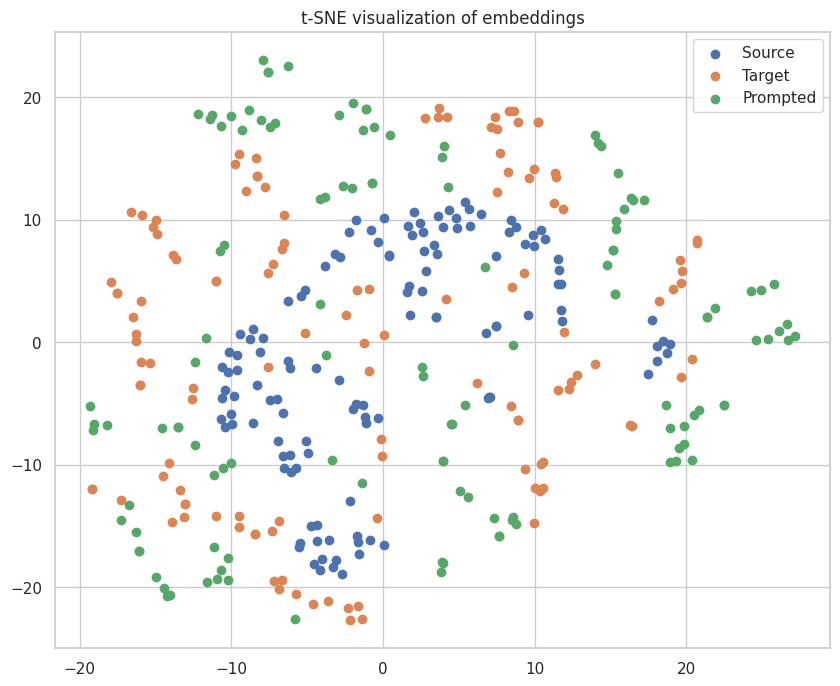

In [915]:
# 임베딩 정렬 (여기서는 30차원으로 줄입니다)
aligned_embeddings = align_embeddings([source_input_min, target_input_min, prompted_input_min], target_dim=30)

# t-SNE 적용
tsne_result = apply_tsne(aligned_embeddings)

# 시각화
labels = ['Source', 'Target', 'Prompted']
visualize_tsne(tsne_result, aligned_embeddings, labels)

In [916]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def align_embeddings_pca(embeddings, target_dim):
    # Convert tensors to numpy arrays if they're not already
    numpy_embeddings = [e.numpy() if isinstance(e, torch.Tensor) else e for e in embeddings]
    
    # Determine the minimum dimension across all embeddings
    min_dim = min(e.shape[1] for e in numpy_embeddings)
    
    # If target_dim is larger than min_dim, set it to min_dim
    target_dim = min(target_dim, min_dim)
    
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=target_dim)
    aligned_embeddings = [pca.fit_transform(emb) for emb in numpy_embeddings]
    
    return aligned_embeddings

def visualize_pca(aligned_embeddings, labels):
    plt.figure(figsize=(10, 8))
    
    for i, emb in enumerate(aligned_embeddings):
        plt.scatter(emb[:, 0], emb[:, 1], label=labels[i])
    
    plt.legend()
    plt.title('PCA visualization of embeddings')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

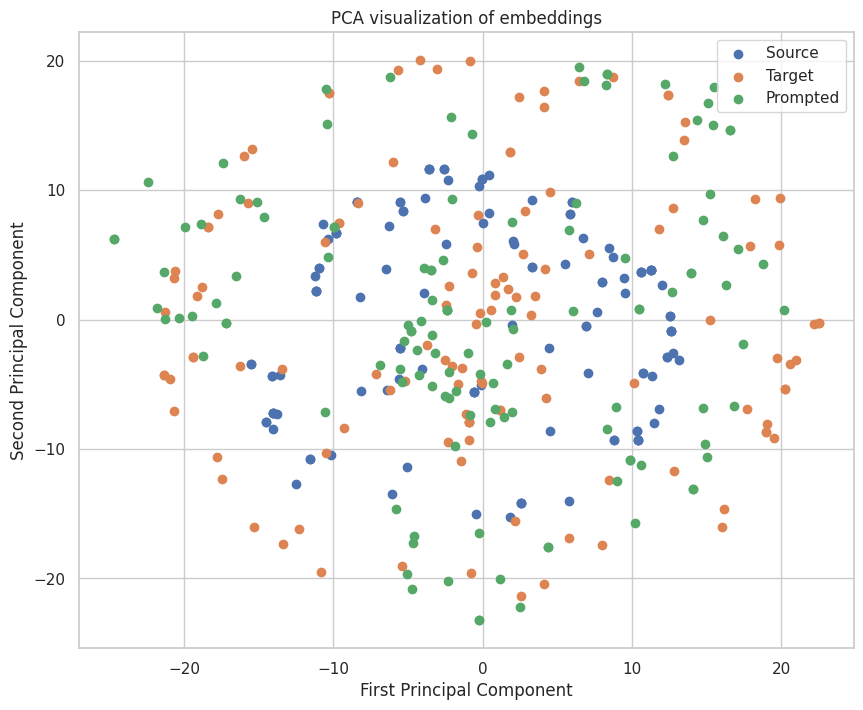

Source embedding shape after PCA: (124, 30)
Target embedding shape after PCA: (124, 30)
Prompted embedding shape after PCA: (124, 30)


In [917]:
# 임베딩 정렬 (여기서는 30차원으로 줄입니다)
aligned_embeddings = align_embeddings_pca([source_input_min, target_input_min, prompted_input_min], target_dim=30)

# 시각화 (처음 두 주성분만 사용)
labels = ['Source', 'Target', 'Prompted']
visualize_pca(aligned_embeddings, labels)

# 결과 확인
for i, emb in enumerate(aligned_embeddings):
    print(f"{labels[i]} embedding shape after PCA: {emb.shape}")

#### tSNE with meta data

In [812]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [779]:
fold=1
shot=5
train_head='False'
source = 'ppgbp'
target = 'bcg'

#### Meta data

In [780]:
data_path = f'../../../../l2p_baseline/code/train/results/dataset/{target}_fold{fold}_test_data.csv'
df_meta = pd.read_csv(data_path)
print("Num of unique Patient: ", df_meta.patient.nunique())
df_meta.describe()

Num of unique Patient:  8


index          SP          DP         Age   Height_cm   Weight_kg  \
count  614.000000  614.000000  614.000000  614.000000  614.000000  614.000000   
mean   306.500000  124.991476   69.773546   37.447883  174.349349   85.283225   
std    177.390811   14.020083    9.058486   16.568009    8.926868   10.547331   
min      0.000000   71.748275   46.383013   20.000000  161.400000   66.600000   
25%    153.250000  116.121876   64.676807   24.000000  170.700000   81.800000   
50%    306.500000  123.991265   71.391769   30.000000  172.000000   87.500000   
75%    459.750000  134.815297   75.526030   60.000000  182.500000   93.800000   
max    613.000000  159.472277   93.814390   65.000000  190.600000  102.000000   

       Comments       group  
count       0.0  614.000000  
mean        NaN    1.750814  
std         NaN    0.734686  
min         NaN    0.000000  
25%         NaN    1.000000  
50%         NaN    2.000000  
75%         NaN    2.000000  
max         NaN    3.000000

In [781]:
path = f'../results/../results/errors_{source}_{target}_shot{shot}_train_head_False_sym_{train_head}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values
# # Offical
# path_embs = glob(f"{source}-{target}*_fold{foldIdx}_shot{shot}_sym_prompt_True_train_head_{train_head}_*.pt")

# Temporal
path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_shot{shot}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

ss_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{source}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
ss_embs = torch.load(ss_path[0], map_location='cpu')

tt_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{target}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
tt_embs = torch.load(tt_path[0], map_location='cpu')

st_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
st_embs = torch.load(st_path[0], map_location='cpu')

print("Get ", path_embs[0])
hidden_embs = torch.load(path_embs[0], map_location='cpu')

Fold 1, Group: {0, 1, 2, 3}
Get  ../results/embeddings/ppgbp-bcg-prompt_global_fold1_shot5_hidden_embs.pt


In [782]:
def tsne_knn_clustering(df, tsne_results, n_clusters=5, n_neighbors=5):
    # Perform KNN clustering on t-SNE results
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(tsne_results)
    distances, indices = knn.kneighbors(tsne_results)

    # Use KMeans for actual clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_results)

    # Create a new dataframe with t-SNE results and cluster labels
    df_clustered = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
    df_clustered['cluster'] = cluster_labels

    # Get indices for each cluster
    cluster_indices = {i: np.where(cluster_labels == i)[0] for i in range(n_clusters)}

    return df_clustered, cluster_indices

In [783]:
def plot_cluster_results(df_clustered, std_sp, std_dp):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_clustered, x='tsne_1', y='tsne_2', hue='cluster', palette='deep')
    plt.title(f't-SNE results with KNN clustering [std sp: {std_sp:.2f}, std dp: {std_dp:.2f}]')
    plt.show()

In [784]:
k=5
metric='SP'

In [785]:
data = hidden_embs.numpy() if isinstance(hidden_embs, torch.Tensor) else hidden_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

K[0]: SP mean: 130.68 and DP mean: 72.99
K[1]: SP mean: 122.51 and DP mean: 74.73
K[2]: SP mean: 117.57 and DP mean: 71.77
K[3]: SP mean: 133.04 and DP mean: 52.89
K[4]: SP mean: 115.35 and DP mean: 63.90
123.82920926862133
67.25398908587078 8.084910122493545


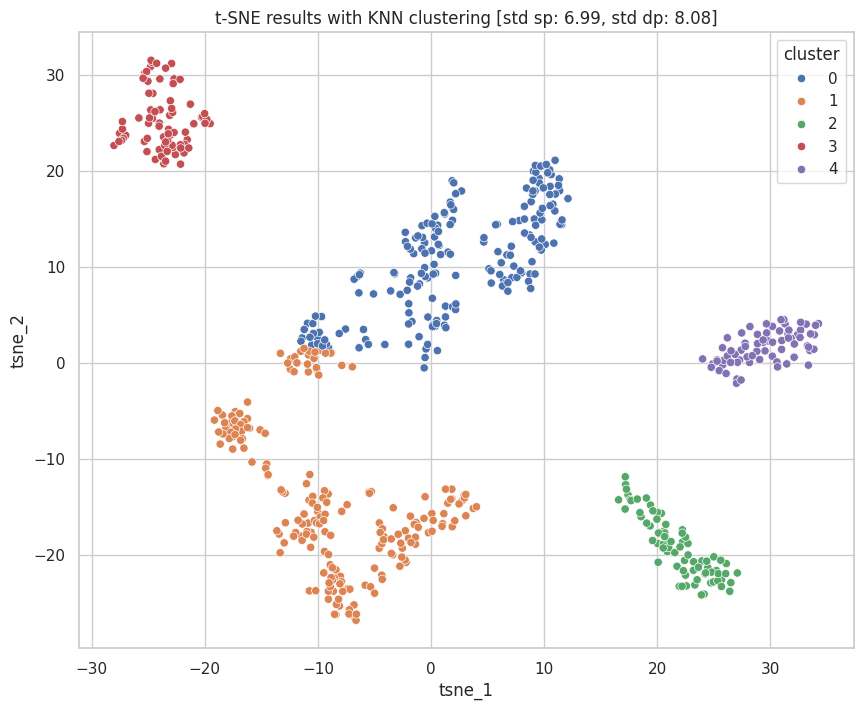

In [786]:
n_clusters=5
sp_list, dp_list = [], []

df_cluster, cluster_idxes = tsne_knn_clustering(df_meta, tsne_embedding, n_clusters=n_clusters)

for n in range(n_clusters):
    sp_list.append(df_meta.iloc[cluster_idxes[n]]['SP'].mean())
    dp_list.append(df_meta.iloc[cluster_idxes[n]]['DP'].mean())
    print(f"K[{n}]: SP mean: {df_meta.iloc[cluster_idxes[n]]['SP'].mean():.2f} and DP mean: {df_meta.iloc[cluster_idxes[n]]['DP'].mean():.2f}")

print(np.mean(sp_list), )
print(np.mean(dp_list), np.std(dp_list))

plot_cluster_results(df_cluster, std_sp=np.std(sp_list), std_dp=np.std(dp_list))

In [787]:
df_tsne = pd.DataFrame()
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

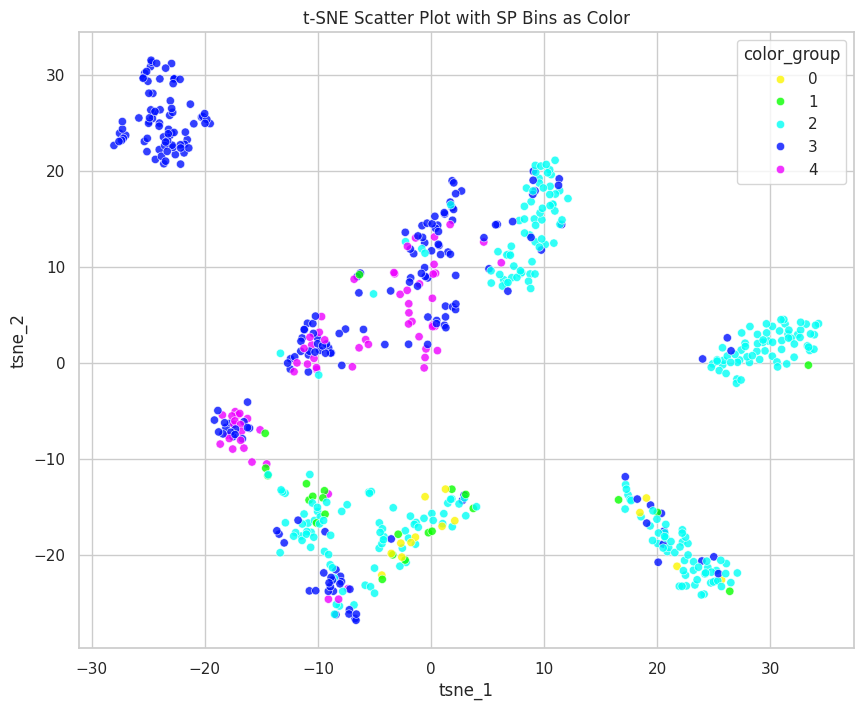

In [788]:
if df_meta[metric].dtype.name in ['float64', 'float32']:
    # Continuous variable: use bins
    df_tsne['color_group'] = pd.cut(df_meta[metric], bins=k, labels=False)
    palette = sns.color_palette("hsv", k)
    title_suffix = f'with {metric} Bins as Color'
else:
    # Discrete variable (integer or object): use unique values
    df_tsne['color_group'] = df_meta[metric]
    unique_values = df_meta[metric].nunique()
    palette = sns.color_palette("hsv", unique_values)
    title_suffix = f'with {metric} as Color'

plt.figure(figsize=(10, 8))
sns.scatterplot(
        x='tsne_1', y='tsne_2',
        hue='color_group',
        palette=palette,
        data=df_tsne,
        legend="full",
        alpha=0.8
    )
plt.title('t-SNE Scatter Plot with SP Bins as Color')
plt.show()

#### ST

In [789]:
df_tsne = pd.DataFrame()
# df_tsne['bins'] = pd.cut(df_meta[metric], bins=k, labels=False)

In [790]:
data = st_embs.numpy() if isinstance(st_embs, torch.Tensor) else st_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

K[0]: SP mean: 127.20 and DP mean: 69.94
K[1]: SP mean: 125.73 and DP mean: 69.81
K[2]: SP mean: 120.10 and DP mean: 70.88
K[3]: SP mean: 124.83 and DP mean: 66.88
K[4]: SP mean: 123.90 and DP mean: 70.52
124.35082257553877
69.60609632691487 1.418581218999036


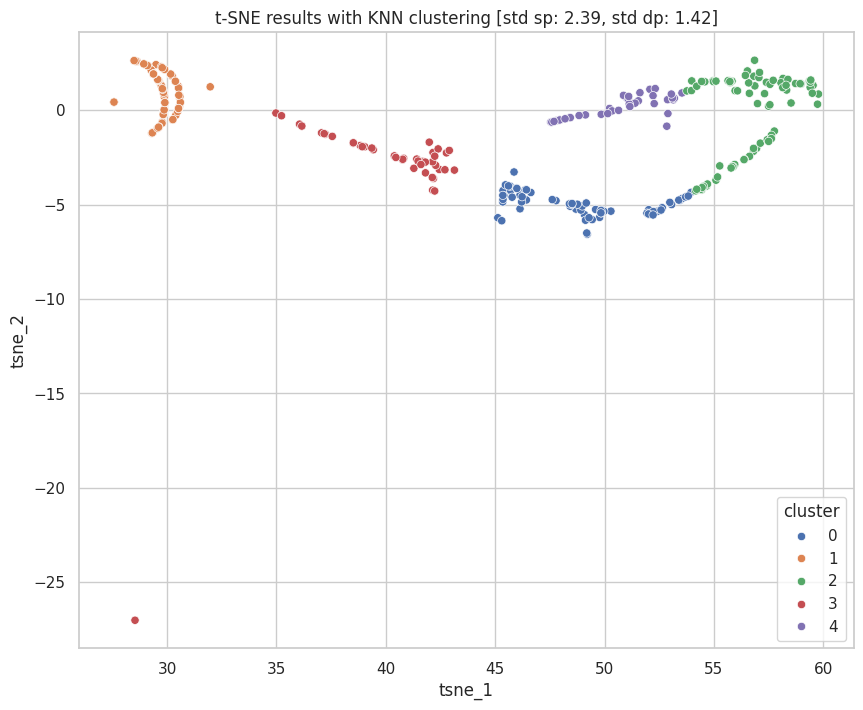

In [791]:
n_clusters=5
sp_list, dp_list = [], []

df_cluster, cluster_idxes = tsne_knn_clustering(df_meta, tsne_embedding, n_clusters=n_clusters)

for n in range(n_clusters):
    sp_list.append(df_meta.iloc[cluster_idxes[n]]['SP'].mean())
    dp_list.append(df_meta.iloc[cluster_idxes[n]]['DP'].mean())
    print(f"K[{n}]: SP mean: {df_meta.iloc[cluster_idxes[n]]['SP'].mean():.2f} and DP mean: {df_meta.iloc[cluster_idxes[n]]['DP'].mean():.2f}")

print(np.mean(sp_list), )
print(np.mean(dp_list), np.std(dp_list))

plot_cluster_results(df_cluster, std_sp=np.std(sp_list), std_dp=np.std(dp_list))

In [792]:
print(np.mean(sp_list), np.std(sp_list))
print(np.mean(dp_list), np.std(dp_list))

124.35082257553877 2.388628741353631
69.60609632691487 1.418581218999036


In [793]:
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

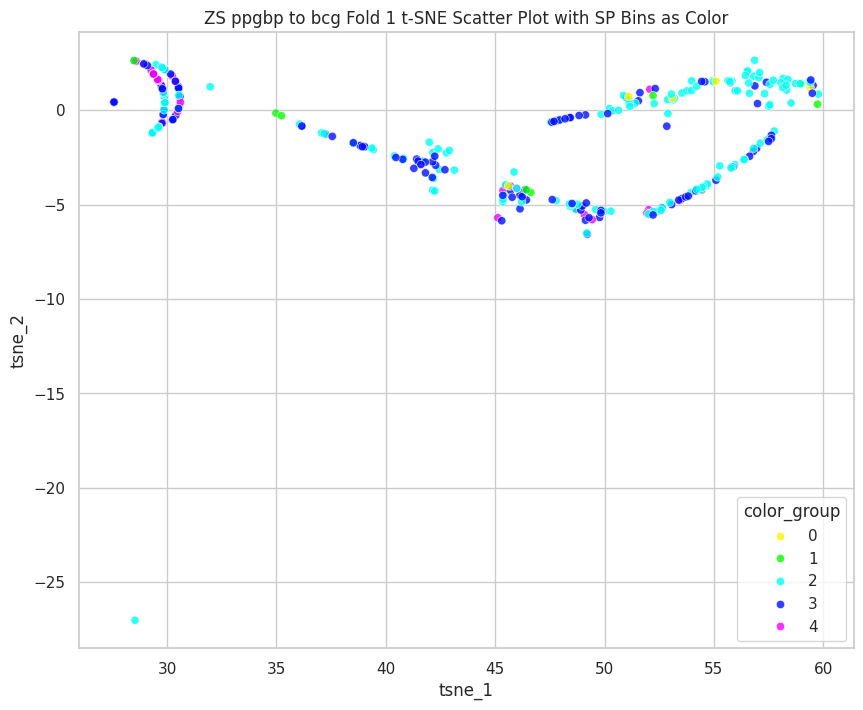

In [794]:
if df_meta[metric].dtype.name in ['float64', 'float32']:
    # Continuous variable: use bins
    df_tsne['color_group'] = pd.cut(df_meta[metric], bins=k, labels=False)
    palette = sns.color_palette("hsv", k)
    title_suffix = f'with {metric} Bins as Color'
else:
    # Discrete variable (integer or object): use unique values
    df_tsne['color_group'] = df_meta[metric]
    unique_values = df_meta[metric].nunique()
    palette = sns.color_palette("hsv", unique_values)
    title_suffix = f'with {metric} as Color'

plt.figure(figsize=(10, 8))
sns.scatterplot(
        x='tsne_1', y='tsne_2',
        hue='color_group',
        palette=palette,
        data=df_tsne,
        legend="full",
        alpha=0.8
    )

plt.title(f'ZS {source} to {target} Fold {fold} t-SNE Scatter Plot with SP Bins as Color')
plt.show()

#### TT

In [795]:
df_tsne = pd.DataFrame()
# df_tsne['bins'] = pd.cut(df_meta[metric], bins=k, labels=False)

In [796]:
data = tt_embs.numpy() if isinstance(tt_embs, torch.Tensor) else tt_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

K[0]: SP mean: 121.07 and DP mean: 69.75
K[1]: SP mean: 132.18 and DP mean: 74.33
K[2]: SP mean: 123.35 and DP mean: 70.01
K[3]: SP mean: 116.55 and DP mean: 75.23
K[4]: SP mean: 132.91 and DP mean: 59.36
125.21092249263582
69.73369808591242 5.640132578426266


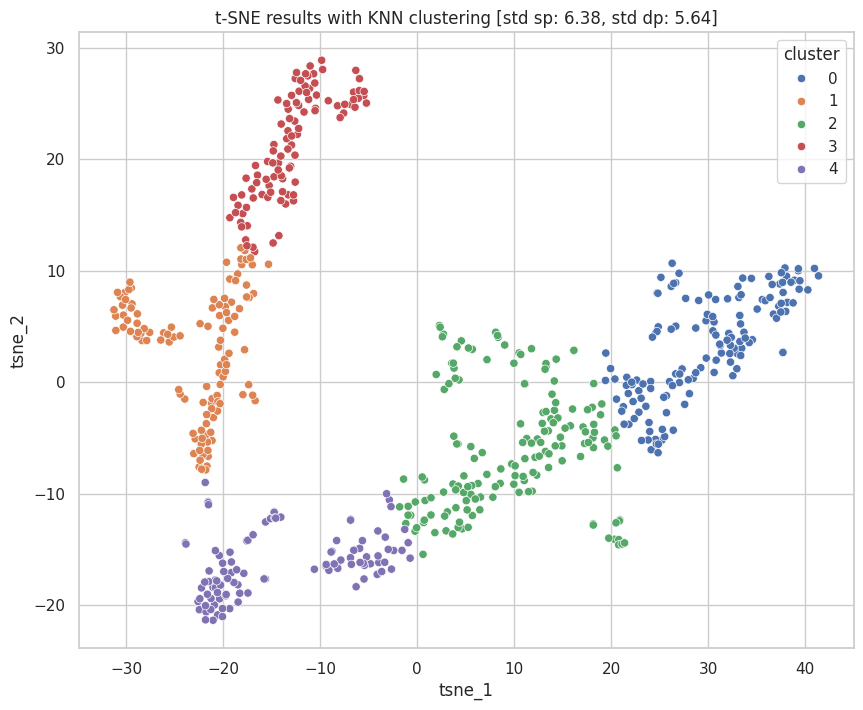

In [797]:
n_clusters=5
sp_list, dp_list = [], []

df_cluster, cluster_idxes = tsne_knn_clustering(df_meta, tsne_embedding, n_clusters=n_clusters)

for n in range(n_clusters):
    sp_list.append(df_meta.iloc[cluster_idxes[n]]['SP'].mean())
    dp_list.append(df_meta.iloc[cluster_idxes[n]]['DP'].mean())
    print(f"K[{n}]: SP mean: {df_meta.iloc[cluster_idxes[n]]['SP'].mean():.2f} and DP mean: {df_meta.iloc[cluster_idxes[n]]['DP'].mean():.2f}")

print(np.mean(sp_list), )
print(np.mean(dp_list), np.std(dp_list))

plot_cluster_results(df_cluster, std_sp=np.std(sp_list), std_dp=np.std(dp_list))

In [798]:
print(np.mean(sp_list), np.std(sp_list))
print(np.mean(dp_list), np.std(dp_list))

125.21092249263582 6.380233322457419
69.73369808591242 5.640132578426266


In [799]:
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

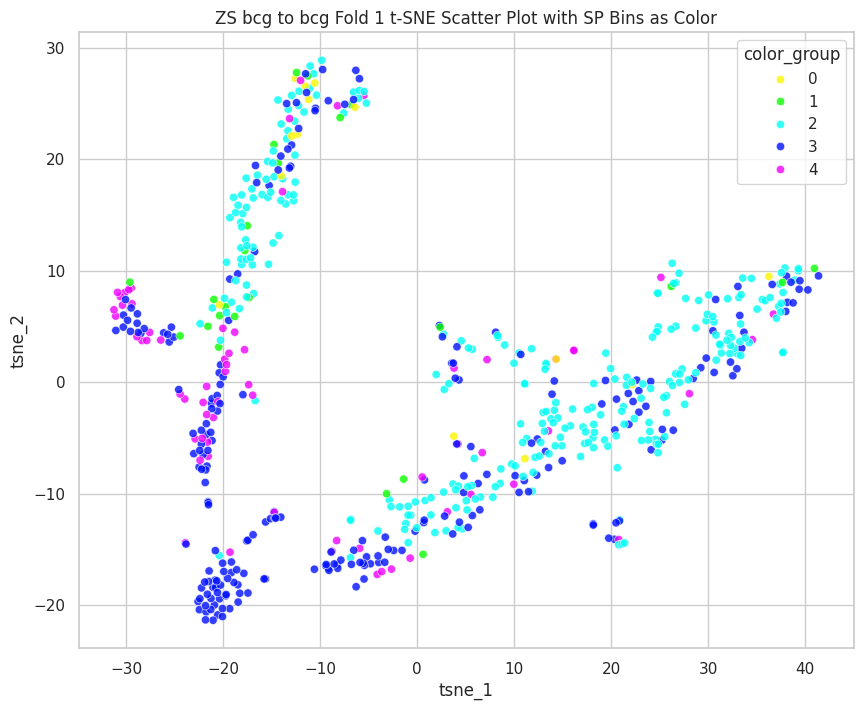

In [800]:
if df_meta[metric].dtype.name in ['float64', 'float32']:
    # Continuous variable: use bins
    df_tsne['color_group'] = pd.cut(df_meta[metric], bins=k, labels=False)
    palette = sns.color_palette("hsv", k)
    title_suffix = f'with {metric} Bins as Color'
else:
    # Discrete variable (integer or object): use unique values
    df_tsne['color_group'] = df_meta[metric]
    unique_values = df_meta[metric].nunique()
    palette = sns.color_palette("hsv", unique_values)
    title_suffix = f'with {metric} as Color'

plt.figure(figsize=(10, 8))
sns.scatterplot(
        x='tsne_1', y='tsne_2',
        hue='color_group',
        palette=palette,
        data=df_tsne,
        legend="full",
        alpha=0.8
    )

plt.title(f'ZS {target} to {target} Fold {fold} t-SNE Scatter Plot with SP Bins as Color')
plt.show()

### Comparing hidden embeddings

In [45]:
baseline='zeroshot'

In [46]:
path = f'../../../../l2p_baseline/code/train/results/errors_{source}-{target}-{baseline}.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values

In [47]:
path_embs = glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{target}-{baseline}_fold{fold}_*.pt")
path_embs = sorted(path_embs)

In [48]:
hidden_embs_baseline = torch.load(path_embs[0], map_location='cpu')

In [49]:
data_baseline = hidden_embs_baseline.numpy() if isinstance(hidden_embs_baseline, torch.Tensor) else hidden_embs_baseline
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
baseline_embedding = tsne.fit_transform(data_baseline)

In [50]:
data_prompted = hidden_embs.numpy() if isinstance(hidden_embs, torch.Tensor) else hidden_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
ours_embedding = tsne.fit_transform(data_prompted)

In [51]:
x_min, x_max = min(baseline_embedding[:, 0].min(), ours_embedding[:, 0].min()), max(baseline_embedding[:, 0].max(), ours_embedding[:, 0].max())
y_min, y_max = min(baseline_embedding[:, 1].min(), ours_embedding[:, 1].min()), max(baseline_embedding[:, 1].max(), ours_embedding[:, 1].max())
x_range = x_max - x_min
y_range = y_max - y_min

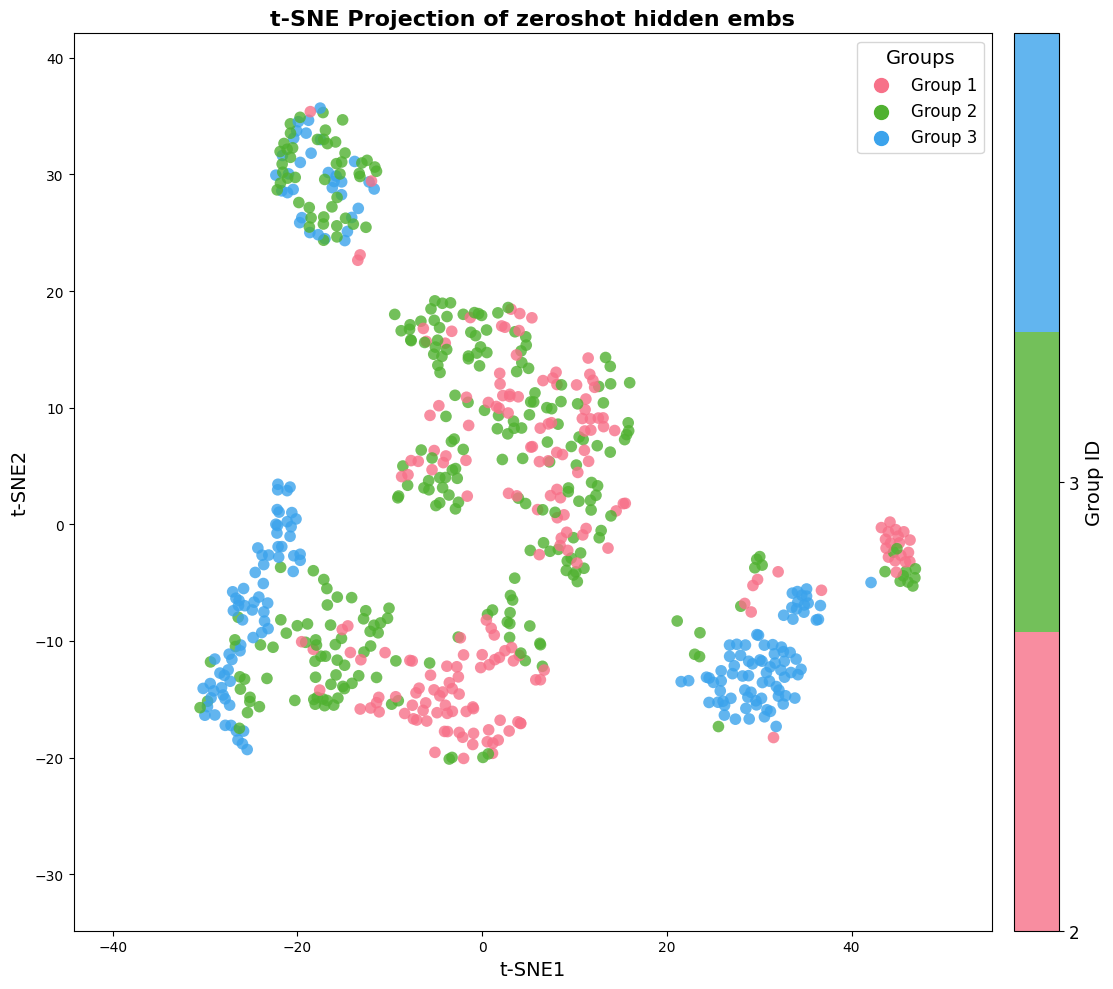

In [52]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(group_ids))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()
# ax.set_facecolor('white')

scatter = plt.scatter(baseline_embedding[:, 0], baseline_embedding[:, 1], 
                      c=group_ids, cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title(f't-SNE Projection of {baseline} hidden embs', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)
plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Add a color bar
cbar = plt.colorbar(scatter, ticks=range(n_groups), 
                    label='Group ID', pad=0.02)
cbar.set_ticklabels(unique_groups)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Group ID', size=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()

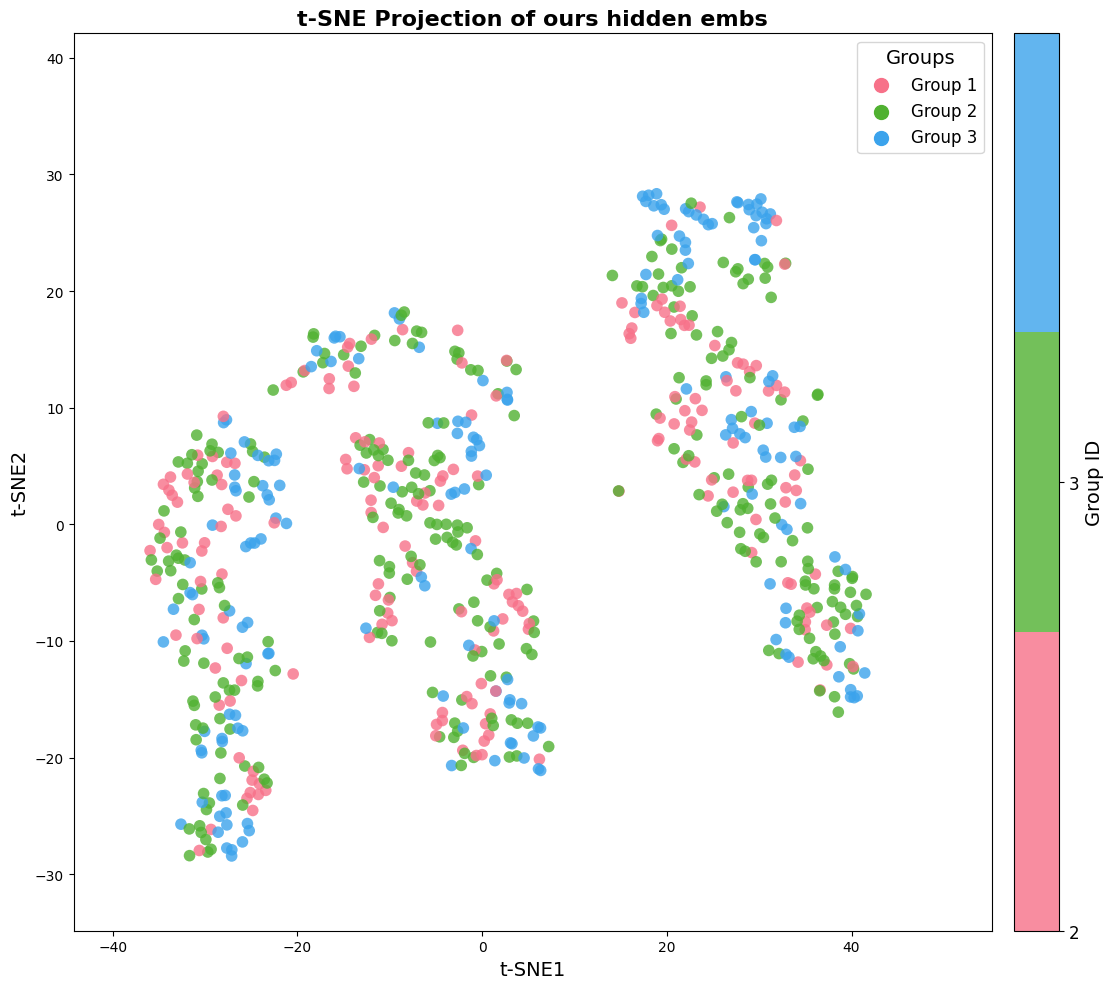

In [53]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(group_ids))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()
# ax.set_facecolor('white')

scatter = plt.scatter(ours_embedding[:, 0], ours_embedding[:, 1], 
                      c=group_ids, cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title('t-SNE Projection of ours hidden embs', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)
plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Add a color bar
cbar = plt.colorbar(scatter, ticks=range(n_groups), 
                    label='Group ID', pad=0.02)
cbar.set_ticklabels(unique_groups)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Group ID', size=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()